<a href="https://colab.research.google.com/github/Obreintelly/Unsupervised_Learning_with_R/blob/main/Dimensionality_Reduction_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

**1. Context**


You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

**2. Study Quesion**

Part 1: Dimensionality Reduction

This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.




**3. Success Metric**



# **2. Relevant Packages and Library**

In [2]:
install.packages("tidyverse")

library(tidyverse)

install.packages("ggplot2")
library(ggplot2)

install.packages("data.table")
library(data.table)

install.packages("DataExplorer") 
library(DataExplorer)

install.packages("mice")
library(mice)

install.packages("VIM") 
library(VIM)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspec

In [3]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# **3. Loading Dataset**

In [102]:
#Loading Dataset

df <- read.csv("http://bit.ly/CarreFourDataset")

# **4. Previewing Dataset**

In [88]:
#Previewing the first 6 rows

head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [62]:
#Previewing the last 6 rows

tail(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [63]:
#Checking our columns 
colnames(df)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"

In [64]:
#Checking the dimensions 

dim(df)

[1] 1000   16

In [65]:
#Checking Structure of the data

str(df)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

Checking for unique items in the columns

In [66]:
#
unique(df$`Invoice ID`)

NULL

In [67]:
unique(df$Branch)

[1] "A" "C" "B"

In [68]:
unique(df$`Customer type`)

NULL

In [69]:
unique(df$`gross income`)

NULL

In [70]:
unique(df$`gross margin percentage`)

NULL

In [71]:
unique(df$cogs)

[1] 522.83  76.40 324.31 465.76 604.17 597.73 413.04 735.60  72.52 164.52
 [11]  57.92 102.04 234.75 431.90 713.80 562.32 482.51 435.66 164.01  80.60
 [21] 430.20 263.94  66.40 172.80 265.89 420.72  33.52 175.34 441.80 224.01
 [31] 470.65 702.63 670.24 193.16 397.68  68.12 313.10 547.92 439.36 240.96
 [41]  86.72 112.22 414.72 789.60  30.74 375.84 510.21 180.09 113.58 826.30
 [51] 639.80 222.95  71.48  15.43  32.32 687.84  88.68 716.80 723.50 183.66
 [61]  74.22 334.38 495.63 158.10 302.96 158.70  66.94 585.66 787.70  18.33
 [71] 894.80 621.20 145.56 455.46 672.03 416.50 441.36 783.10 101.90 595.14
 [81] 290.04 154.00 321.44 244.55 581.42 382.60 345.66  42.47 461.94 189.52
 [91] 448.60 153.86 579.24  89.75  97.16 878.70  74.70 158.25 496.20  48.71
[101] 706.95 207.63 349.56 212.45 886.70 164.28 372.78 305.82 819.70  32.98
[111] 294.63 509.88 522.63 727.11  81.06 109.70  51.36 109.60 106.88 796.48
[121] 399.84 899.64 511.28 451.76 655.83 161.25 285.57 548.32 812.52 277.34
[131] 552.78 139.36 524.70 487.80 270.66 131.55 206.52 519.10 580.00 898.00
[141] 905.00 686.00  30.41 467.70 277.56 301.40 264.56 574.88 259.68 366.16
[151] 241.92 749.16  98.88 647.76 461.45  72.17 251.40 874.98 560.34 345.44
[161]  63.69 320.53 152.80 399.00 340.56 955.80 989.80 307.68 486.64 350.05
[171] 400.25 166.80 317.34 158.32 304.56 177.36 157.57 443.28 260.40 449.82
[181] 307.76 155.00 274.48  86.38  54.24 755.92 185.88  74.07 279.24 231.12
[191] 147.04 790.20 102.20 163.55  74.29  87.40  25.29 166.00 356.95 114.90
[201] 229.96 429.87 259.00  88.85 207.27 599.85 285.30  91.11 897.57 236.07
[211] 839.34 461.80 139.26  18.28 123.85 283.92 758.96 172.02 272.10 434.56
[221]  59.05  12.54  86.50 174.32 624.33 148.24 544.20 507.36 162.74  31.77
[231] 756.81 295.28 519.40 186.28  87.05 221.10  66.10  89.69 224.46 119.54
[241] 186.40 250.60 750.96 380.72 244.20  89.70 310.88 511.42 418.95 351.90
[251]  28.78  95.00 471.20 130.48  66.35 155.46 129.00 263.76 675.54  65.80
[261] 153.20 222.40  54.45 688.80 141.88 746.00 282.96 355.40 337.15  42.24
[271] 193.86  24.06 598.26 335.79 218.20 381.68 709.90 440.20 559.68  37.00
[281]  15.34 598.98 190.68 333.40  74.86 213.75 339.57 664.16 403.00 194.95
[291]  62.48  72.72 181.10 259.60 115.36 470.28 240.04  88.61 199.64  39.01
[301]  48.61 204.76 119.68 505.40 281.61 710.32  79.44 163.82 479.58 138.66
[311]  71.15 139.95 781.30 198.74  63.24 373.95 207.69 176.28 206.37  39.42
[321]  91.56 308.85 129.12 390.96 498.90 377.04 204.52 145.44 198.18  98.70
[331] 385.10  46.96  73.50 142.25 687.60 347.70 142.95 385.38 144.27 391.79
[341] 538.30 485.15 133.95 701.37  71.95 714.00 182.14 135.00 993.00 361.83
[351] 383.11 243.00  30.24 356.56 375.50 954.40  82.50  74.97 647.68 755.76
[361] 199.58 439.32 164.96 326.72 461.88 143.60 193.50 183.82 121.92 420.66
[371] 252.48 335.45 483.50 318.42 668.43 387.92  94.60 329.32  53.22 498.45
[381] 299.56 204.70  75.82 280.62 323.20 486.63 127.54 241.44 379.50  76.82
[391] 522.60  79.74 387.50 271.35 122.31 246.36 173.16 236.58 184.88  13.98
[401] 198.75 684.53 269.04  68.95 274.84 226.12 119.10 342.10  43.74 104.85
[411]  77.52 407.44  96.11 181.52  81.51 114.44 176.54 115.80 252.15 972.10
[421] 203.36  16.28 365.49 372.19  62.61 336.35 906.50 138.16  86.54 140.76
[431] 668.78  47.44 893.16 331.72 203.94  68.16 326.88  87.20 707.44 802.89
[441]  12.78 133.70  19.15 276.60 137.22  27.07  39.12 448.26 132.06 318.05
[451]  25.00  83.08 147.80 696.60 793.90 465.70  35.89 202.60 730.50 295.80
[461]  22.62 256.70 545.50 260.05 222.12  21.58  98.84 502.62 160.20 431.30
[471] 580.56 322.20 195.54 166.30 336.28 343.70  38.60 527.76 328.00 185.70
[481] 603.80 369.80 197.96 410.90 148.60  22.96 699.12  69.40 196.60 202.56
[491] 121.20 199.78 607.36 126.44 541.44  98.13 412.16  73.97  31.90 138.80
[501] 186.62  88.45 193.44 145.50 504.30 306.45  95.70 635.18 214.55 379.96
[511] 696.85 408.73  51.47 274.30 196.95  69.46 359.60 137.13 499.02 224.64
[521] 125.74 490.26 457.05 156.84 119.72 543.60 88

In [72]:
unique(df$Gender)

[1] "Female" "Male"

In [73]:
unique(df$Quantity)

[1]  7  5  8  6 10  2  3  4  1  9

In [74]:
unique(df$Rating)

[1]  9.1  9.6  7.4  8.4  5.3  4.1  5.8  8.0  7.2  5.9  4.5  6.8  7.1  8.2  5.7
[16]  4.6  6.9  8.6  4.4  4.8  5.1  9.9  6.0  8.5  6.7  7.7  7.5  7.0  4.7  7.6
[31]  7.9  6.3  5.6  9.5  8.1  6.5  6.1  6.6  5.4  9.3 10.0  6.4  4.3  4.0  8.7
[46]  9.4  5.5  8.3  7.3  4.9  4.2  9.2  7.8  5.2  9.0  8.8  6.2  9.8  9.7  5.0
[61]  8.9

In [75]:
unique(df$Time)

[1] "13:08" "10:29" "13:23" "20:33" "10:37" "18:30" "14:36" "11:38" "17:15"
 [10] "13:27" "18:07" "17:03" "10:25" "16:48" "19:21" "16:19" "11:03" "10:39"
 [19] "18:00" "15:30" "11:24" "10:40" "12:20" "11:15" "17:36" "19:20" "15:31"
 [28] "12:17" "19:48" "15:36" "19:39" "12:43" "14:49" "10:12" "10:42" "12:28"
 [37] "19:15" "17:17" "13:24" "13:01" "18:45" "10:11" "13:03" "20:39" "19:47"
 [46] "17:24" "15:47" "12:45" "17:08" "10:19" "15:10" "14:42" "15:46" "11:49"
 [55] "19:01" "11:26" "11:28" "15:55" "20:36" "17:47" "10:55" "13:40" "12:27"
 [64] "14:35" "16:40" "15:43" "15:01" "10:04" "18:50" "12:46" "18:17" "18:21"
 [73] "17:04" "14:20" "15:48" "16:24" "18:56" "19:56" "18:37" "10:17" "14:31"
 [82] "10:23" "20:35" "16:57" "17:55" "19:54" "16:42" "12:09" "20:05" "20:38"
 [91] "13:11" "10:16" "18:14" "13:22" "11:27" "16:44" "18:19" "14:50" "20:54"
[100] "20:19" "10:43" "14:30" "11:32" "10:41" "12:44" "20:07" "20:31" "12:29"
[109] "15:26" "20:48" "12:02" "17:26" "19:52" "14:57" "18:44" "13:26" "16:17"
[118] "15:57" "13:18" "20:34" "18:36" "14:40" "16:43" "20:59" "15:39" "12:21"
[127] "19:25" "13:00" "13:48" "19:57" "10:36" "16:37" "17:11" "15:07" "16:07"
[136] "11:56" "18:23" "13:05" "19:40" "13:58" "14:43" "19:18" "16:21" "19:44"
[145] "19:42" "15:24" "14:12" "13:32" "16:20" "16:31" "11:36" "19:17" "17:34"
[154] "12:04" "17:01" "10:50" "19:16" "16:47" "10:00" "11:51" "15:00" "11:19"
[163] "19:46" "19:00" "10:53" "12:50" "20:50" "13:41" "19:08" "20:23" "11:30"
[172] "19:30" "18:03" "10:13" "19:58" "10:01" "11:57" "10:02" "14:51" "12:42"
[181] "17:38" "20:24" "18:08" "15:53" "15:05" "18:27" "16:55" "12:58" "18:59"
[190] "13:44" "13:46" "18:06" "12:38" "15:56" "14:29" "19:14" "10:52" "12:55"
[199] "19:28" "13:52" "10:54" "18:31" "18:24" "18:09" "15:16" "17:07" "19:26"
[208] "11:20" "16:49" "12:01" "11:25" "18:42" "14:47" "19:43" "14:04" "16:11"
[217] "19:06" "15:34" "11:22" "11:23" "10:46" "13:25" "14:53" "19:22" "11:00"
[226] "19:24" "17:22" "20:55" "16:05" "13:34" "18:13" "11:44" "15:51" "16:52"
[235] "20:52" "16:28" "13:29" "11:09" "15:02" "14:21" "18:01" "13:30" "14:38"
[244] "17:37" "17:20" "20:29" "11:46" "13:42" "14:44" "14:16" "15:54" "10:21"
[253] "16:46" "20:14" "17:09" "17:43" "19:05" "10:08" "13:12" "20:51" "17:29"
[262] "11:34" "18:58" "20:26" "15:08" "13:21" "12:48" "19:53" "19:09" "16:30"
[271] "13:07" "18:48" "17:27" "15:59" "11:21" "15:49" "13:02" "20:21" "15:04"
[280] "16:10" "12:14" "11:06" "18:22" "19:02" "15:44" "20:01" "13:45" "15:40"
[289] "16:58" "11:12" "15:12" "20:37" "17:44" "16:23" "12:12" "19:33" "14:28"
[298] "17:54" "12:25" "12:52" "19:50" "15:32" "13:19" "13:37" "14:55" "12:31"
[307] "10:26" "20:18" "20:04" "13:38" "17:30" "15:28" "19:07" "18:55" "19:36"
[316] "10:57" "17:13" "13:57" "13:53" "16:53" "16:51" "15:37" "20:15" "19:35"
[325] "15:42" "14:11" "17:58" "11:02" "15:09" "13:47" "16:59" "14:15" "15:19"
[334] "18:33" "12:10" "11:40" "16:54" "15:25" "20:47" "18:20" "11:48" "14:14"
[343] "11:17" "12:40" "17:53" "16:36" "10:48" "18:05" "12:07" "19:49" "15:52"
[352] "20:46" "10:34" "13:55" "11:43" "16:03" "20:03" "19:41" "18:04" "10:31"
[361] "13:28" "17:16" "18:43" "10:30" "20:40" "12:08" "17:45" "10:28" "10:49"
[370] "12:34" "18:51" "19:38" "12:32" "10:33" "19:55" "14:33" "13:54" "12:15"
[379] "12:37" "15:06" "15:58" "14:03" "16:38" "11:07" "12:23" "14:13" "19:11"
[388] "18:53" "14:22" "10:06" "20:08" "12:56" "10:18" "11:45" "16:08" "12:24"
[397] "19:51" "18:10" "15:27" "16:04" "14:41" "14:19" "14:08" "11:29" "12:16"
[406] "20:00" "15:29" "14:58" "11:52" "17:46" "14:45" "11:39" "13:06" "20:43"
[415] "16:34" "13:10" "17:10" "10:22" "19:29" "14:27" "12:22" "11:59" "17:59"
[424] "12:51" "13:56" "19:45" "16:18" "18:57" "11:18" "14:06" "20:13" "15:14"
[433] "16:06" "12:47" "20:42" "20:10" "14:24" "11:42" "17:49" "15:33" "10:38"
[442] "12:39" "14:26" "12:41" "15:20" "16:33" "20:44" "11:16" "12:30" "17:48"
[451] "20:30" "13:59" "11:58" "16:50" "18:02" "17:52" "20:32" "16:09" "11:33"
[460] "15:15" "20:06" "1

In [76]:
unique(df$`Product line`)

NULL

In [77]:
unique(df$Payment)

[1] "Ewallet"     "Cash"        "Credit card"

# **5. Data Cleaning**

In [78]:
#Checking for duplicates in the dataset

any(duplicated(df))

[1] FALSE

There are no duplicates in the dataset

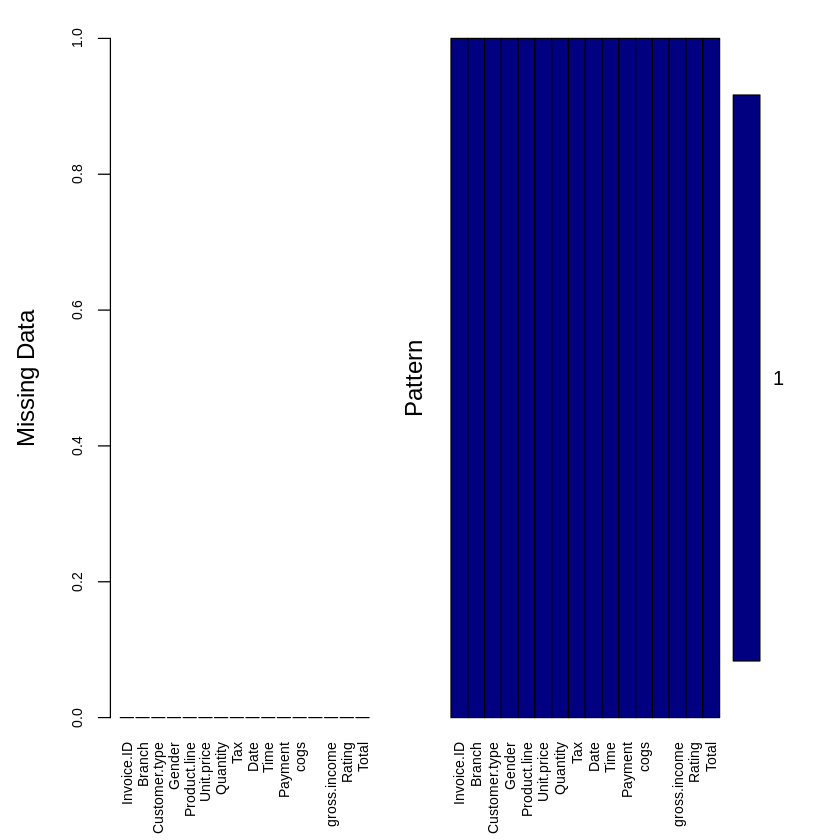

In [79]:
#checking for missing values 
mp <- aggr(df, col= c('navyblue', 'yellow'),
numbers= TRUE, sortvars=TRUE, labels= names(df), cex.axis =.7, gap=3, ylab=c("Missing Data", "Pattern"))

There are no missing values in the dataset

In [80]:
glimpse(df)

Rows: 1,000
Columns: 16
$ Invoice.ID              <chr> "750-67-8428", "226-31-3081", "631-41-3108", "…
$ Branch                  <chr> "A", "C", "A", "A", "A", "C", "A", "C", "A", "…
$ Customer.type           <chr> "Member", "Normal", "Normal", "Member", "Norma…
$ Gender                  <chr> "Female", "Female", "Male", "Male", "Male", "M…
$ Product.line            <chr> "Health and beauty", "Electronic accessories",…
$ Unit.price              <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.8…
$ Quantity                <int> 7, 5, 7, 8, 7, 7, 6, 10, 2, 3, 4, 4, 5, 10, 10…
$ Tax                     <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29…
$ Date                    <chr> "1/5/2019", "3/8/2019", "3/3/2019", "1/27/2019…
$ Time                    <chr> "13:08", "10:29", "13:23", "20:33", "10:37", "…
$ Payment                 <chr> "Ewallet", "Cash", "Credit card", "Ewallet", "…
$ cogs                    <dbl> 522.83, 76.40, 324.31, 465.76, 604.17, 597.73,…
$ gross.margin.p

Branch, Customer Type, Gender, Product Line, Quantity and Payment are erroneously classed as characters. They are factors

In [103]:
#Creating Year, Month and Day Columns
df$Date <- as.Date(df$Date, "%m/%d/%Y")


df$Year <- year(ymd(df$Date))

df$Month <- month(ymd(df$Date))

df$Day <- day(ymd(df$Date))

In [104]:
#Create Uniform Case of the columns
df <- df %>%
rename_at( c("Branch", "Customer.type", "Gender", "Product.line", "Unit.price", "Quantity", "Tax", "Date", "Time", "Payment", "cogs", "gross.margin.percentage", "gross.income", "Rating", "Total", "Year","Month", "Day"), 
 .fun = toupper)

In [91]:
head(df)

,Invoice.ID,BRANCH,CUSTOMER.TYPE,GENDER,PRODUCT.LINE,UNIT.PRICE,QUANTITY,TAX,DATE,TIME,PAYMENT,COGS,GROSS.MARGIN.PERCENTAGE,GROSS.INCOME,RATING,TOTAL,Year,MONTH,DAY
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,2019,1,5
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200,2019,3,8
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255,2019,3,3
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,2019,1,27
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,2019,2,8
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,2019,3,25


In [106]:
#Factorizing erroneously classed dtypes
df$CUSTOMER.TYPE <- factor(df$CUSTOMER.TYPE)

df$BRANCH <- factor(df$BRANCH)

df$GENDER <- factor(df$GENDER)

df$PRODUCT.LINE <- factor(df$PRODUCT.LINE)

df$QUANTITY <- as.integer(factor(df$QUANTITY))

df$PAYMENT <- factor(df$PAYMENT)

df$RATING <- as.integer(factor(df$RATING))


In [105]:
#Separate Hours and Minutes
df$HOUR <- format(strptime(df$TIME, "%H:M"), "%H")

df$MINUTE <- format(strptime(df$TIME, "%H:%M"), "%M")


In [95]:
str(df)

'data.frame':	1000 obs. of  21 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ BRANCH                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ CUSTOMER.TYPE          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ GENDER                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ PRODUCT.LINE           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ UNIT.PRICE             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ QUANTITY               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ TAX                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ DATE                   : Date, format: "2019-01-05" "2019-03-08" ...
 $ TIME                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ PAYMENT                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ COGS                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ GROSS.MARGI

In [96]:
unique(df$Hour)

NULL

In [97]:
unique(df$Year)

[1] 2019

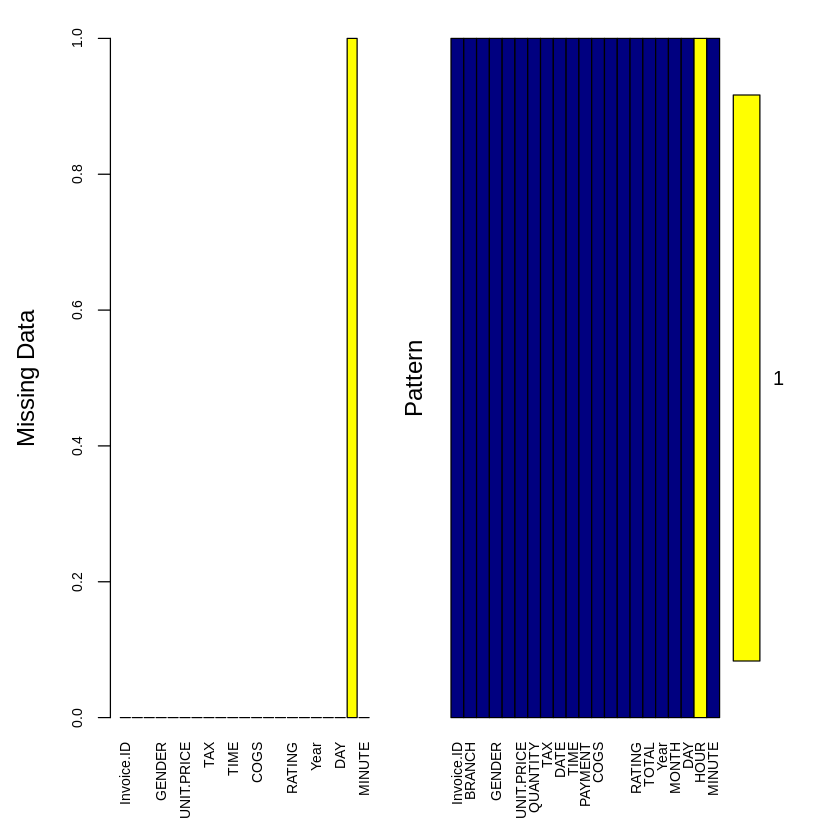

In [98]:
#checking for missing values 
mp <- aggr(df, col= c('navyblue', 'yellow'),
numbers= TRUE, sortvars=TRUE, labels= names(df), cex.axis =.7, gap=3, ylab=c("Missing Data", "Pattern"))

In [107]:
#Dropping the Hour Column because it does not have any entries 
#We also drop the time column, the year and the Invoice ID as we do not them
#in the analysis
df <- select(df, -c(HOUR, TIME, YEAR, DATE))

df <- select(df, -1)

In [108]:
#Identifying numeric variables

numeric <- unlist(lapply(df, is.numeric))

numeric

BRANCH           CUSTOMER.TYPE                  GENDER 
                  FALSE                   FALSE                   FALSE 
           PRODUCT.LINE              UNIT.PRICE                QUANTITY 
                  FALSE                    TRUE                    TRUE 
                    TAX                    DATE                 PAYMENT 
                   TRUE                   FALSE                   FALSE 
                   COGS GROSS.MARGIN.PERCENTAGE            GROSS.INCOME 
                   TRUE                    TRUE                    TRUE 
                 RATING                   TOTAL                   MONTH 
                   TRUE                    TRUE                    TRUE 
                    DAY                  MINUTE 
                   TRUE                   FALSE

In [117]:
#Confirming that the margin percentage is correct

round(df$GROSS.INCOME/ df$TOTAL*100, digits= 3) == round(df$GROSS.MARGIN.PERCENTAGE, digits = 3)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [ ]:
#Categorical and Numerical Variables deriviation 
categorical <- df[, c(1:4, 6,8)]

num.cols <- df[, c(5, 7, 9:13)]

# **6. Outlier Detection**

In [111]:
head(df)

,BRANCH,CUSTOMER.TYPE,GENDER,PRODUCT.LINE,UNIT.PRICE,QUANTITY,TAX,DATE,PAYMENT,COGS,GROSS.MARGIN.PERCENTAGE,GROSS.INCOME,RATING,TOTAL,MONTH,DAY,MINUTE
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,Ewallet,522.83,4.761905,26.1415,52,548.9715,1,5,08
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,Cash,76.40,4.761905,3.8200,57,80.2200,3,8,29
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,Credit card,324.31,4.761905,16.2155,35,340.5255,3,3,23
4,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,Ewallet,465.76,4.761905,23.2880,45,489.0480,1,27,33
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,Ewallet,604.17,4.761905,30.2085,14,634.3785,2,8,37
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,Ewallet,597.73,4.761905,29.8865,2,627.6165,3,25,30


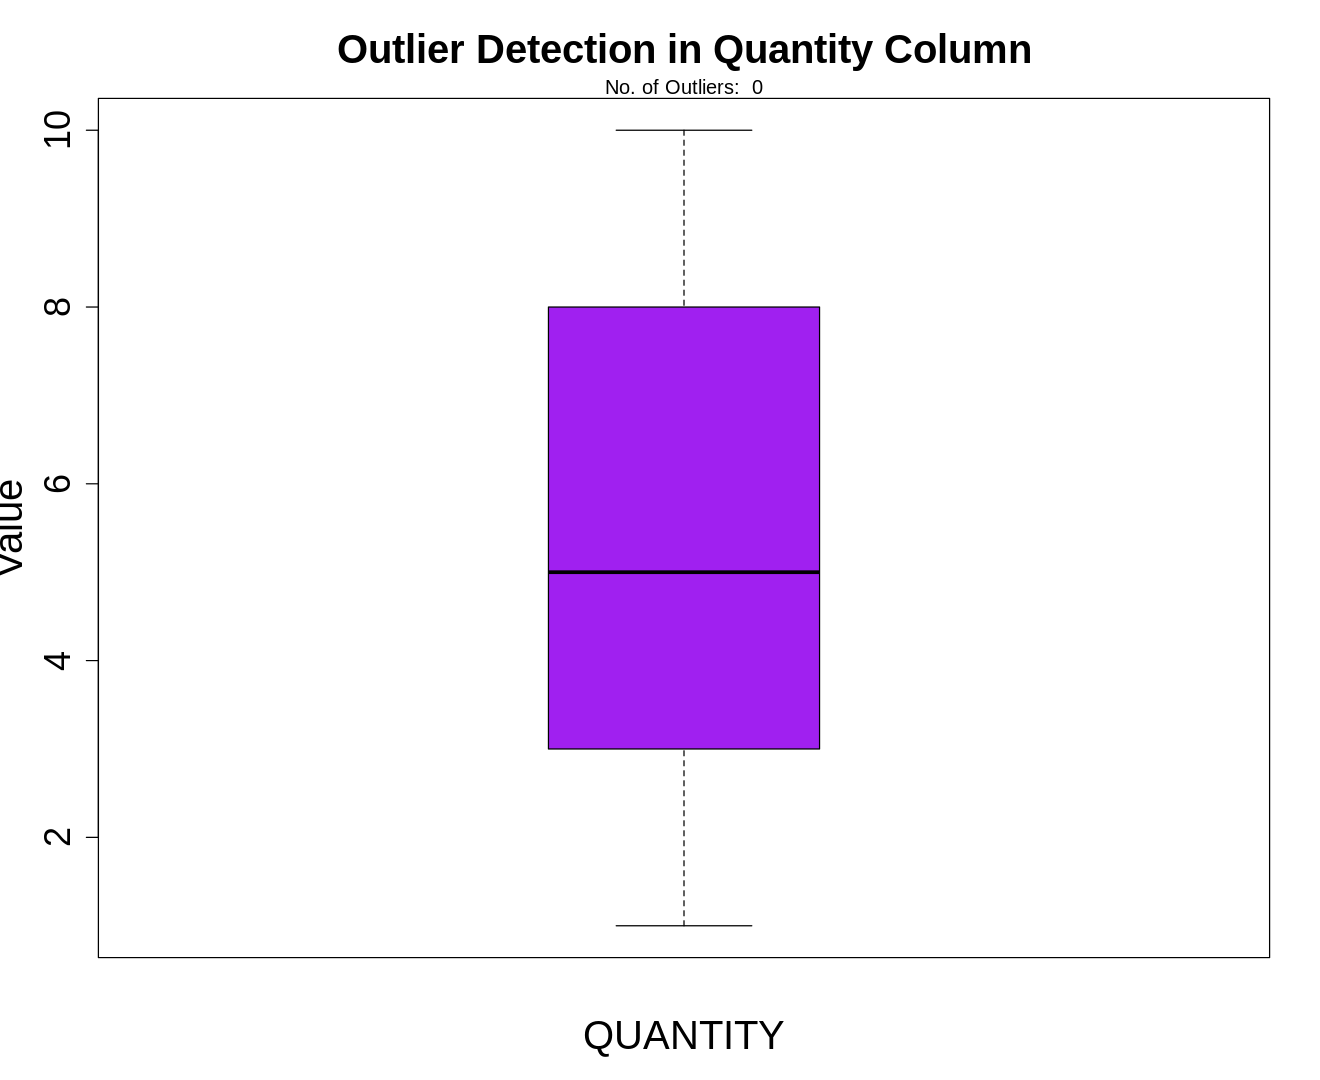

In [110]:
#Box plot for outlier detection in the Quantity

options(repr.plot.width = 11, repr.plot.height =9)

boxplot(df$QUANTITY, main="Outlier Detection in Quantity Column", xlab = "QUANTITY", ylab = "Value", boxwex=0.5, cex.main=2, cex.lab=2.0, cex.axis=1.8, col = "purple")

quantity_outlier <- boxplot.stats(df$QUANTITY)$out
mtext(paste("No. of Outliers: ", paste(length(quantity_outlier), collapse=", ")), cex=1)

There are no outliers in the Quantity Column

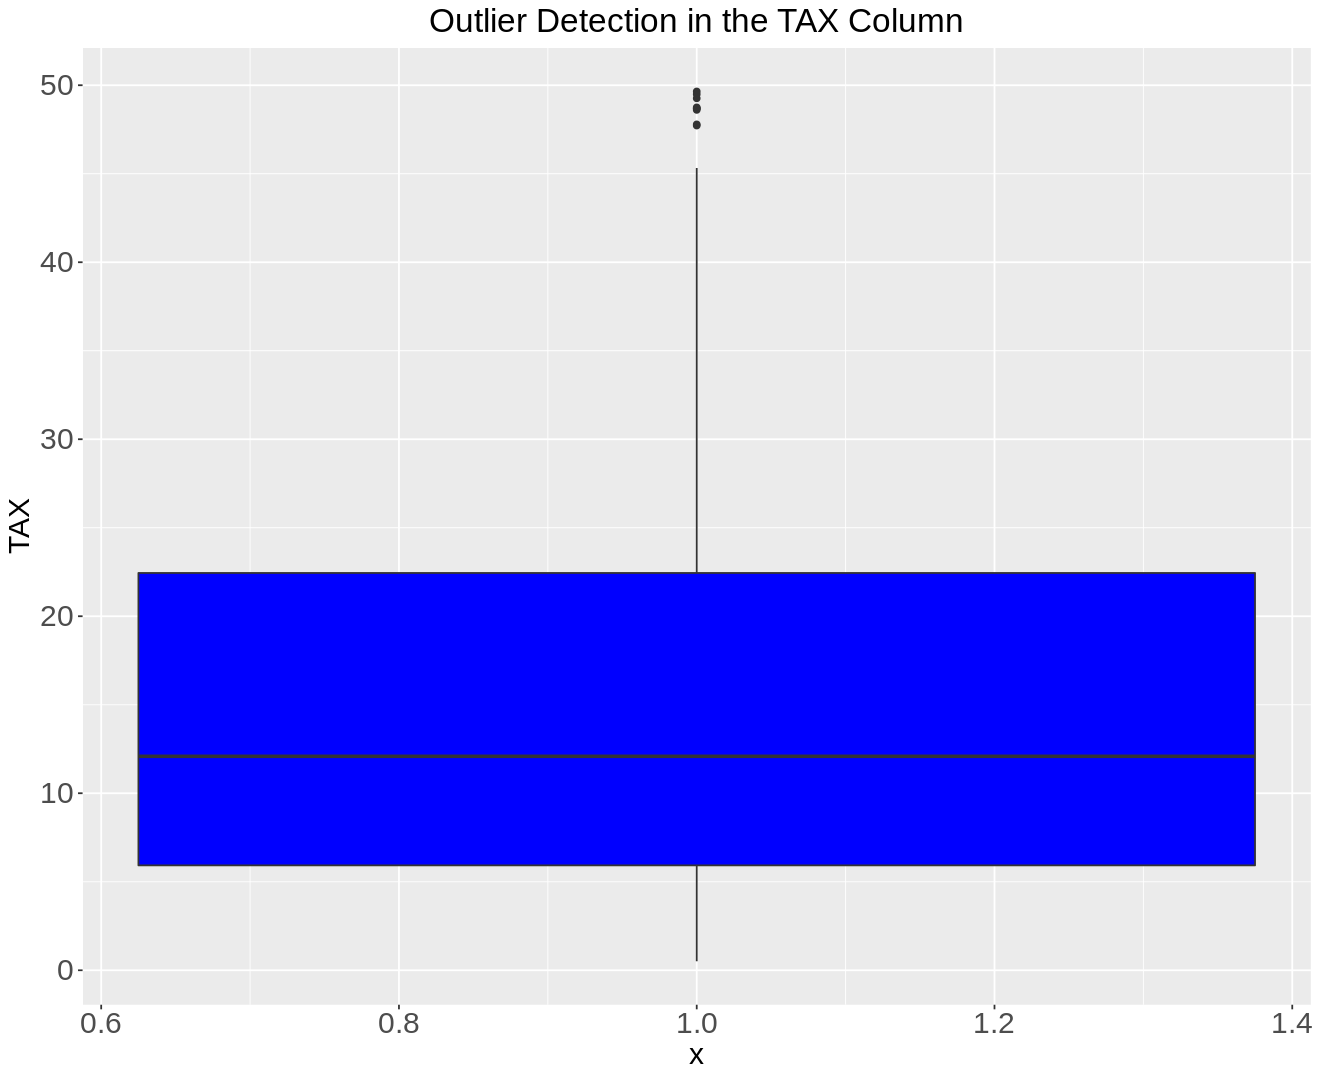

In [118]:
df %>%
  ggplot(aes(x= 1, y= TAX)) +
  geom_boxplot(fill= 'blue') +
  ggtitle("Outlier Detection in the TAX Column") + 
   theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

Although we have around five outliers in the Tax column, they represent actual tax values. We cannot drop them as a result.

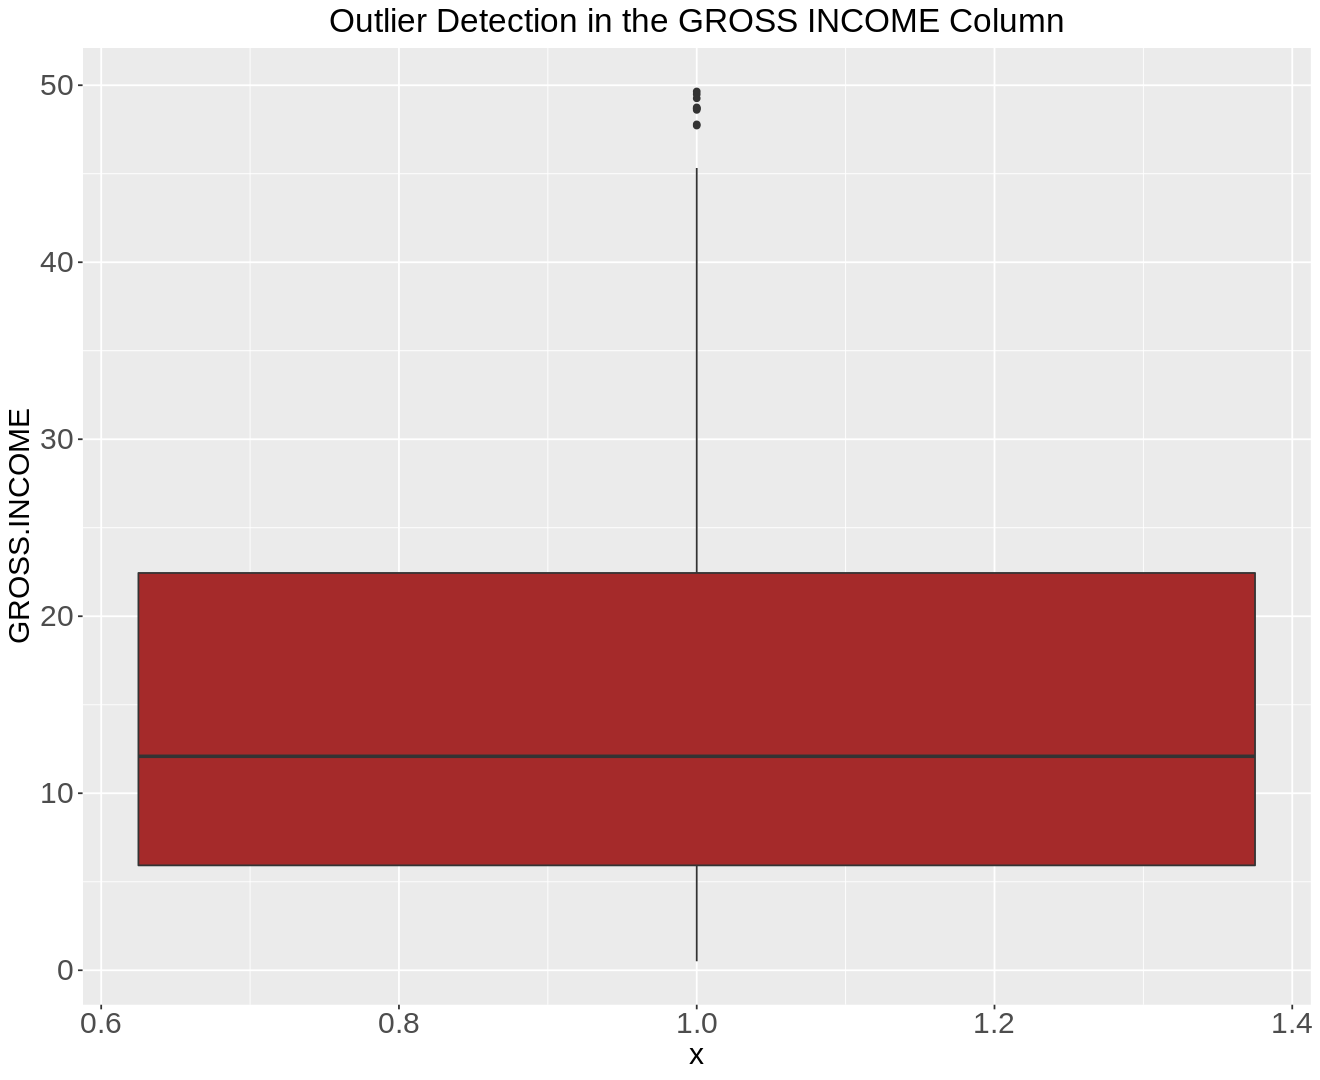

In [123]:
df %>%
  ggplot(aes(x= 1, y= GROSS.INCOME)) +
  geom_boxplot(fill= 'brown') +
  ggtitle("Outlier Detection in the GROSS INCOME Column") + 
   theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

We have 5 outliers in the Gross Income Column, We do not drop them as they represent actual data points. 

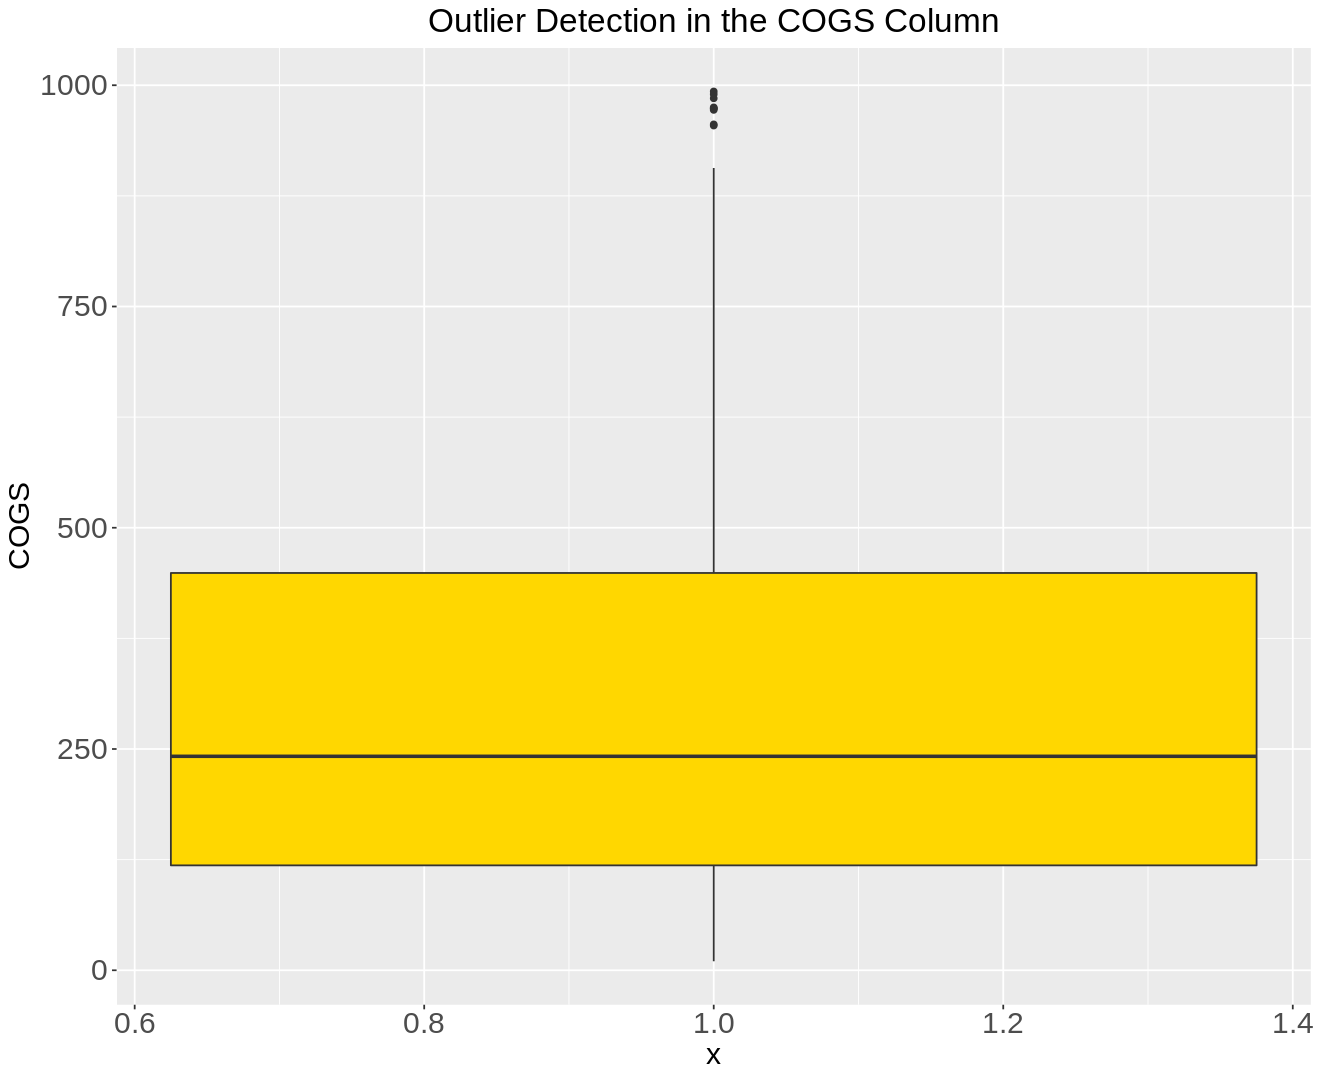

In [124]:
df %>%
  ggplot(aes(x= 1, y= COGS)) +
  geom_boxplot(fill= 'gold') +
  ggtitle("Outlier Detection in the COGS Column") + 
   theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

The 5 outliers in the Cost of Goods Sold represent actual data points as such we do not drop them from the dataset

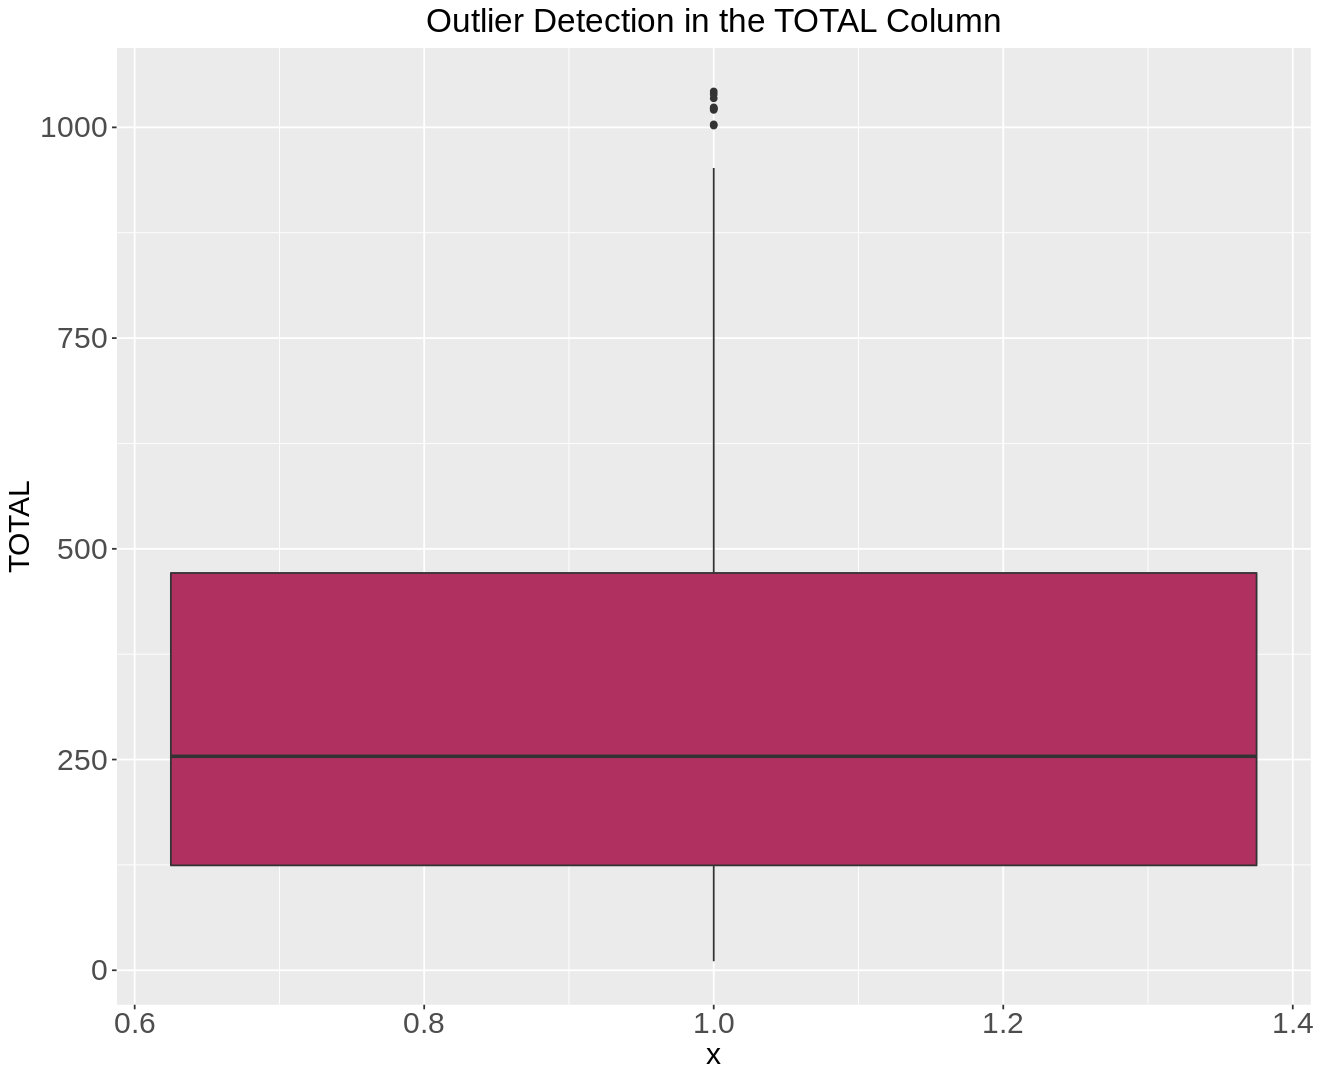

In [126]:
df %>%
  ggplot(aes(x= 1, y= TOTAL)) +
  geom_boxplot(fill= 'maroon') +
  ggtitle("Outlier Detection in the TOTAL Column") + 
   theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

The outliers in the Total Column represent actual data points. We retain them in the dataset. 

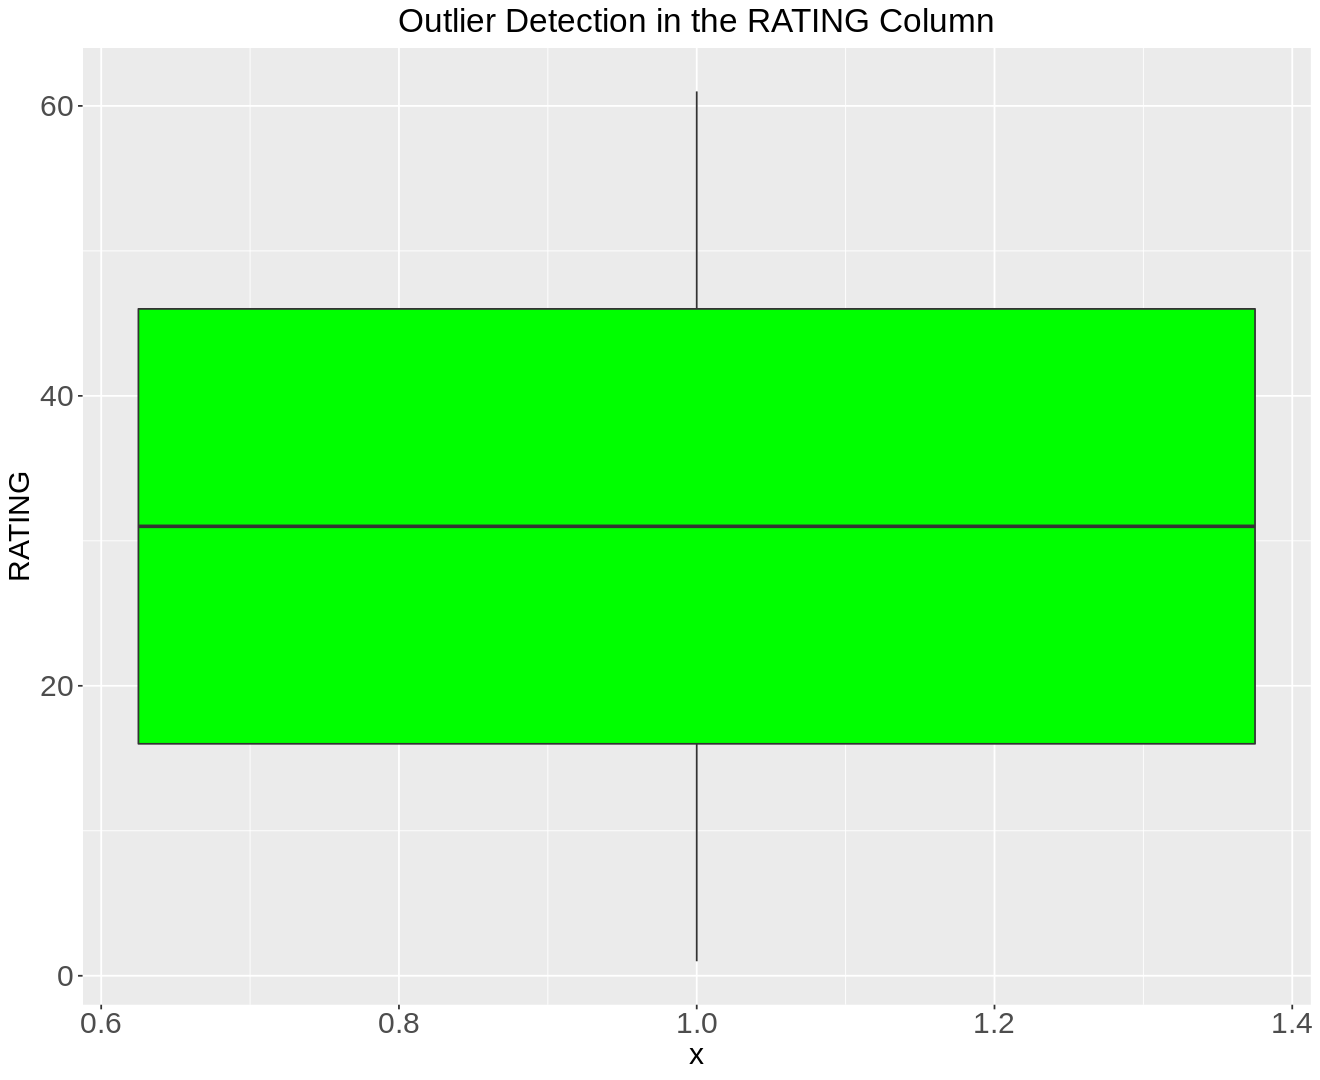

In [127]:
df %>%
  ggplot(aes(x= 1, y= RATING)) +
  geom_boxplot(fill= 'green') +
  ggtitle("Outlier Detection in the RATING Column") + 
   theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

There are no outliers in the Rating Column 

# **7. Exploratory Data Analysis**

# **Univariate Analysis**

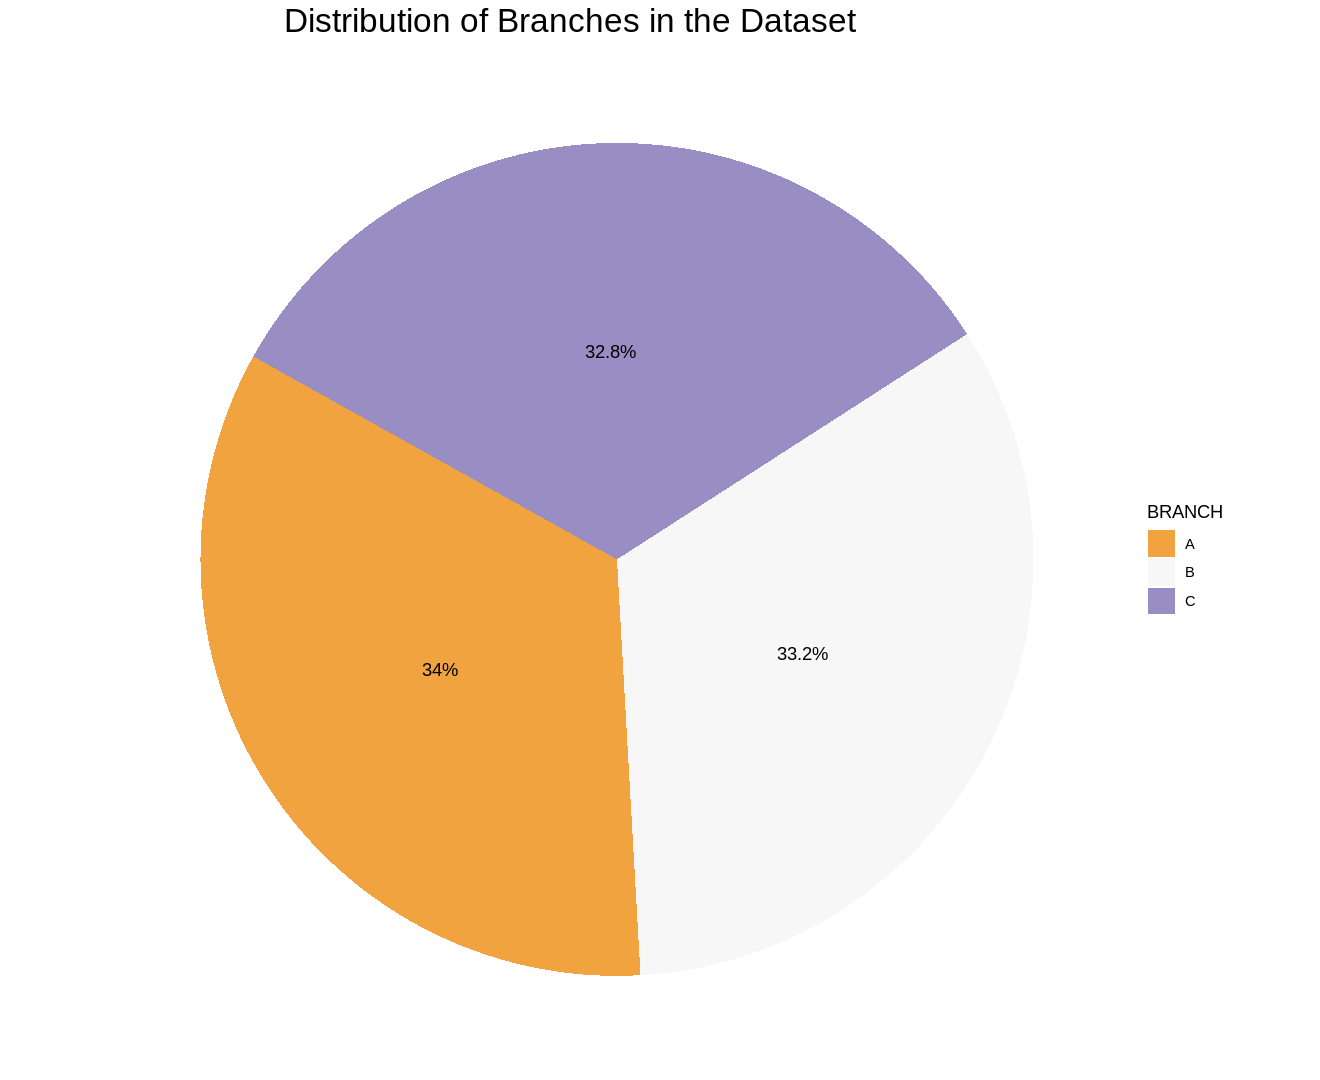

In [155]:
branch_perc <- df %>%
  filter(BRANCH != "NA") %>%
  group_by(BRANCH) %>%
  count() %>%
  ungroup() %>%
  arrange(desc(BRANCH)) %>%
  mutate( percentage = round(n/sum(n), 4)*100, lab.pos = cumsum(percentage)- 0.5 * percentage)
ggplot(branch_perc, aes(x = "", y= percentage, fill = BRANCH)) +
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "PuOr") + labs(title= "Distribution of Branches in the Dataset") + 
  theme(plot.title = element_text(hjust = 0.4, size = 20))

  

#

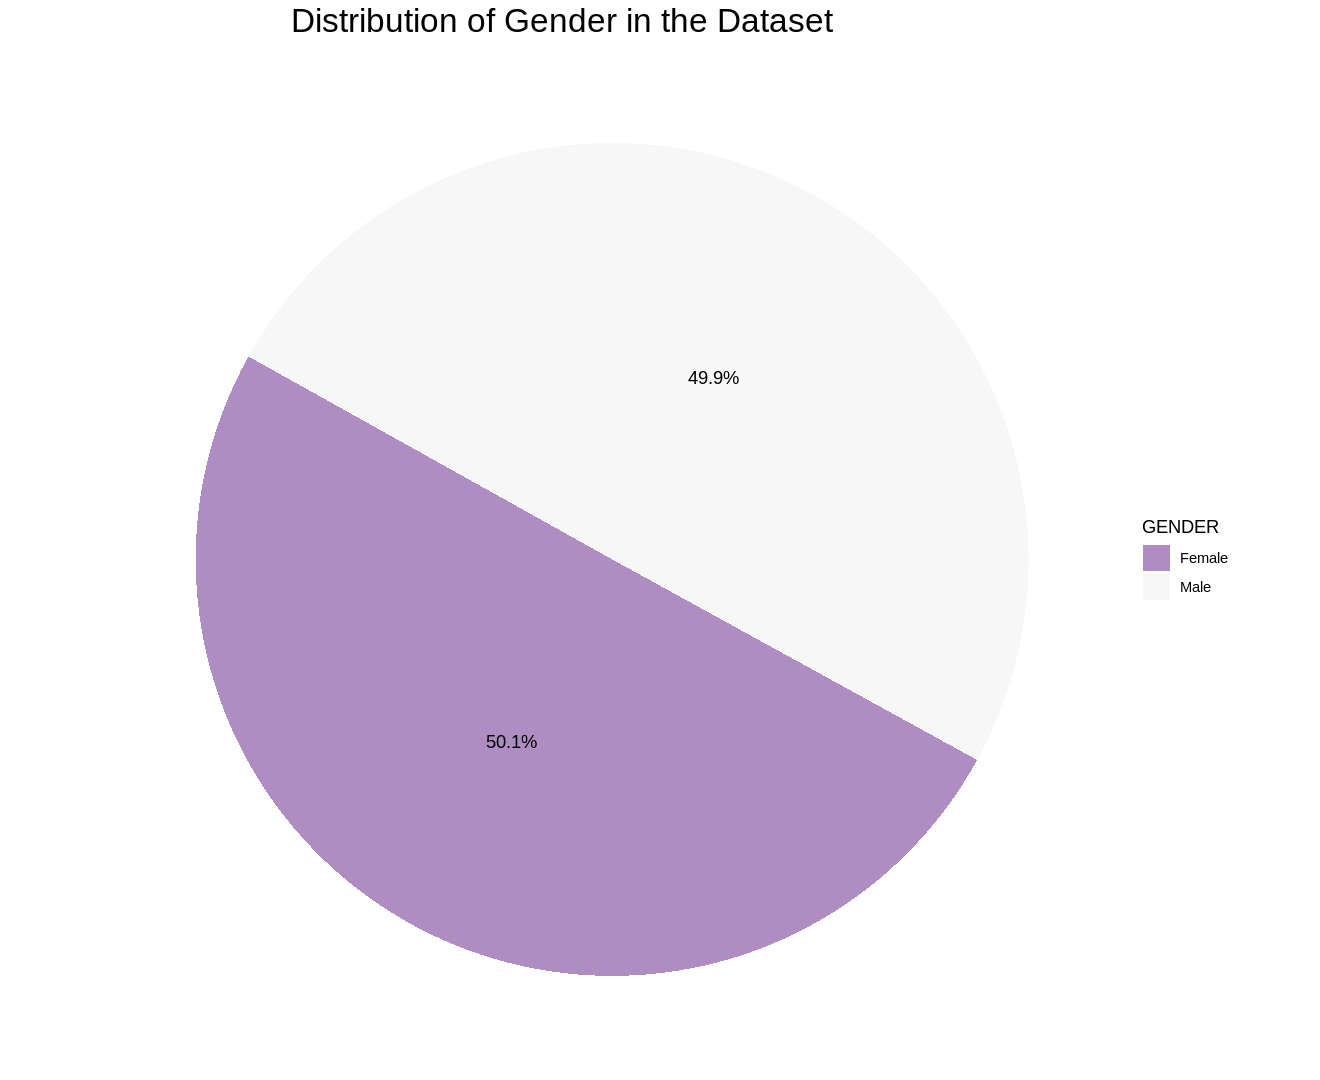

In [132]:
gender_perc <- df %>%
  filter(GENDER != "NA") %>%
  group_by(GENDER) %>%
  count() %>%
  ungroup() %>%
  arrange(desc(GENDER)) %>%
  mutate( percentage = round(n/sum(n), 4)*100, lab.pos = cumsum(percentage)- 0.5 * percentage)
ggplot(gender_perc, aes(x = "", y= percentage, fill = GENDER)) +
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "PRGn") + labs(title= "Distribution of Gender in the Dataset") + 
  theme(plot.title = element_text(hjust = 0.4, size = 20))

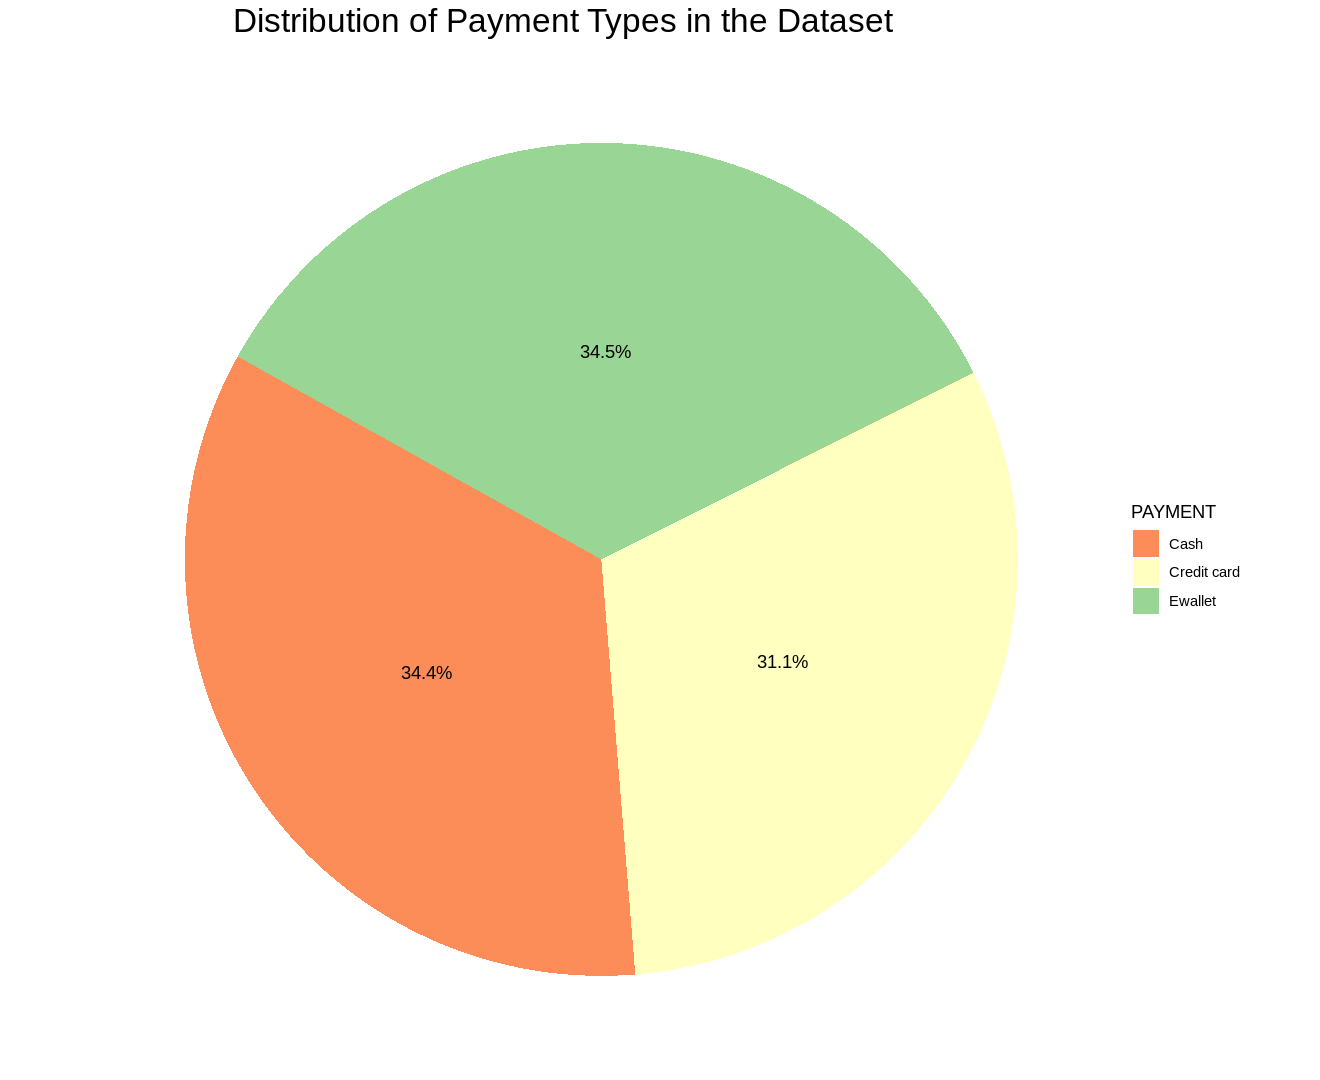

In [134]:
payment_perc <- df %>%
  filter(PAYMENT != "NA") %>%
  group_by(PAYMENT) %>%
  count() %>%
  ungroup() %>%
  arrange(desc(PAYMENT)) %>%
  mutate( percentage = round(n/sum(n), 4)*100, lab.pos = cumsum(percentage)- 0.5 * percentage)
ggplot(payment_perc, aes(x = "", y= percentage, fill = PAYMENT)) +
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Spectral") + labs(title= "Distribution of Payment Types in the Dataset") + 
  theme(plot.title = element_text(hjust = 0.4, size = 20))

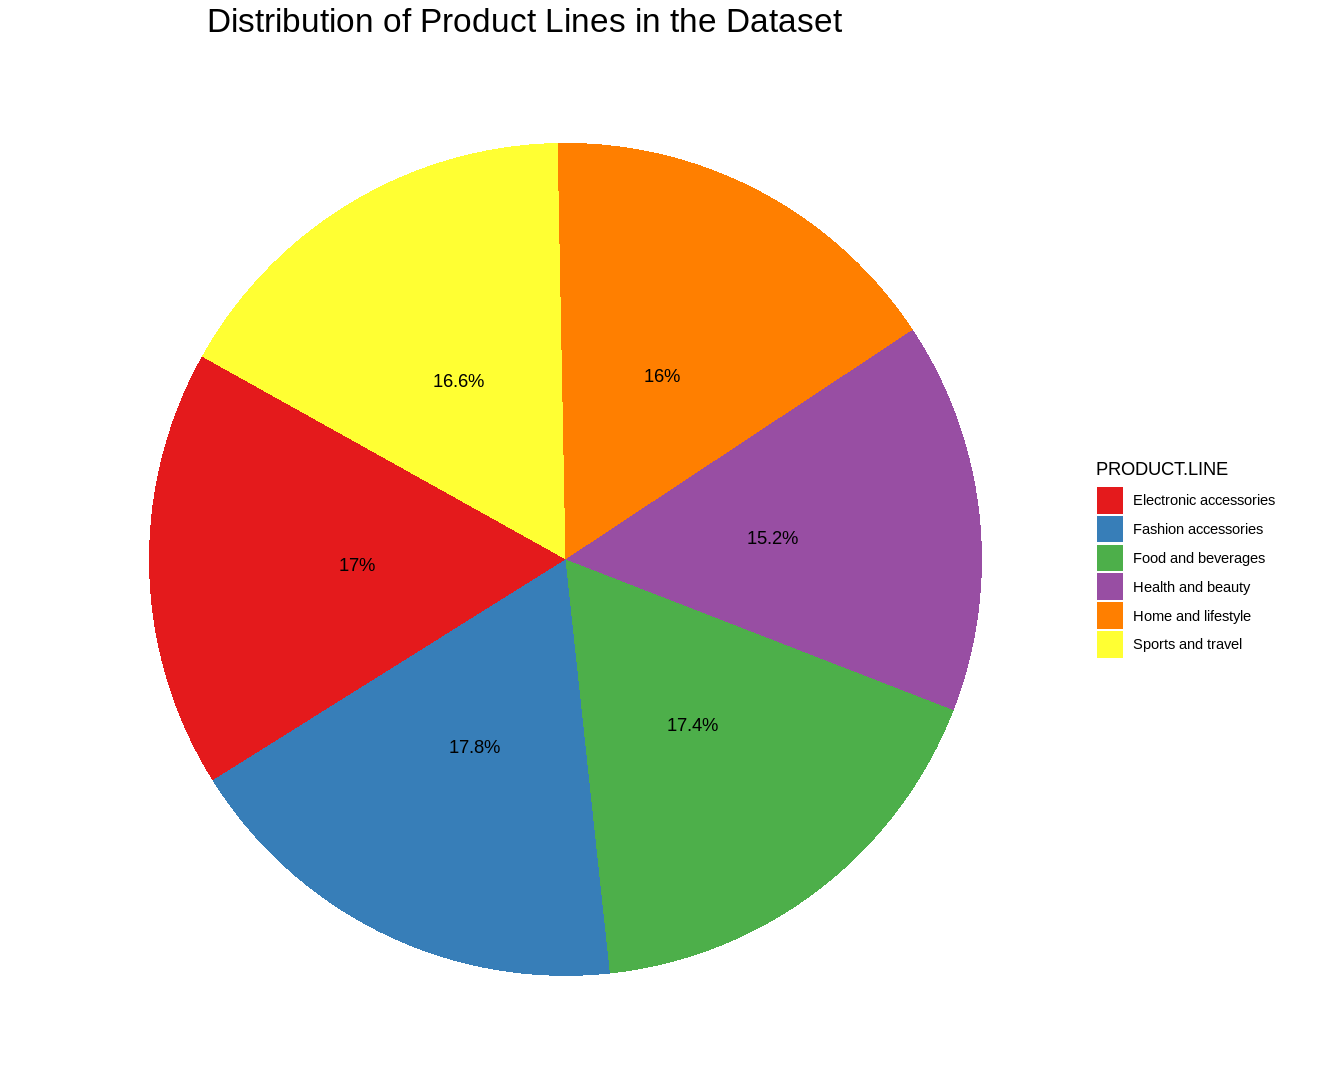

In [136]:
productline_perc <- df %>%
  filter(PRODUCT.LINE != "NA") %>%
  group_by(PRODUCT.LINE) %>%
  count() %>%
  ungroup() %>%
  arrange(desc(PRODUCT.LINE)) %>%
  mutate( percentage = round(n/sum(n), 4)*100, lab.pos = cumsum(percentage)- 0.5 * percentage)
ggplot(productline_perc, aes(x = "", y= percentage, fill = PRODUCT.LINE)) +
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set1") + labs(title= "Distribution of Product Lines in the Dataset") + 
  theme(plot.title = element_text(hjust = 0.4, size = 20))

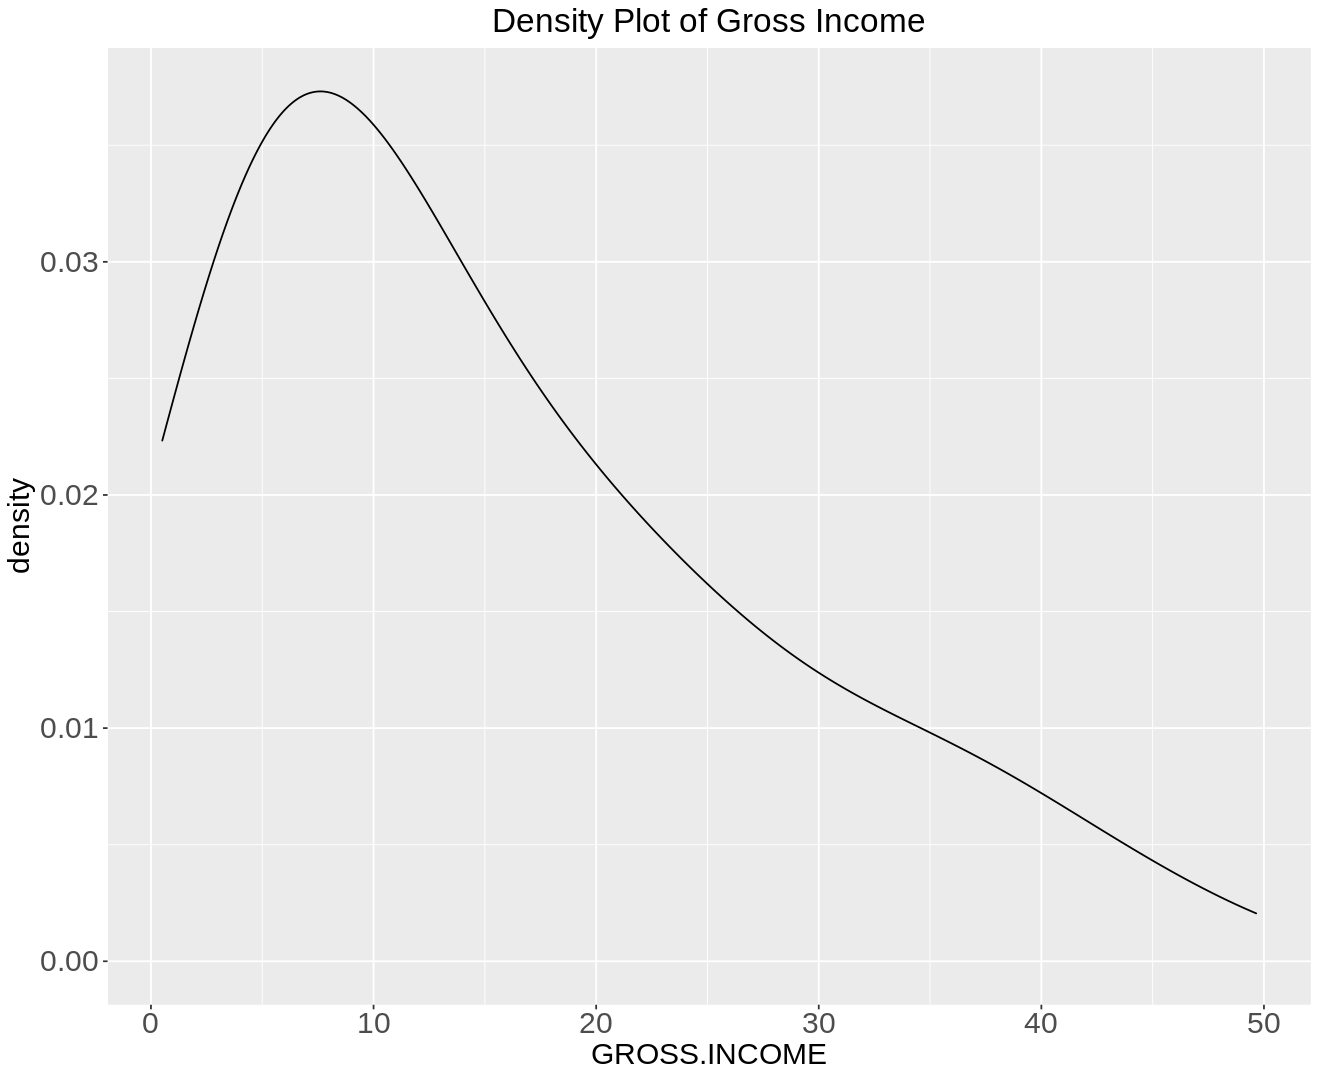

In [140]:
#Density Plot Distribution of the Income Column
ggplot(df, aes(x= GROSS.INCOME)) + 
geom_density(bw = 5) + 
ggtitle("Density Plot of Gross Income") + 
 theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

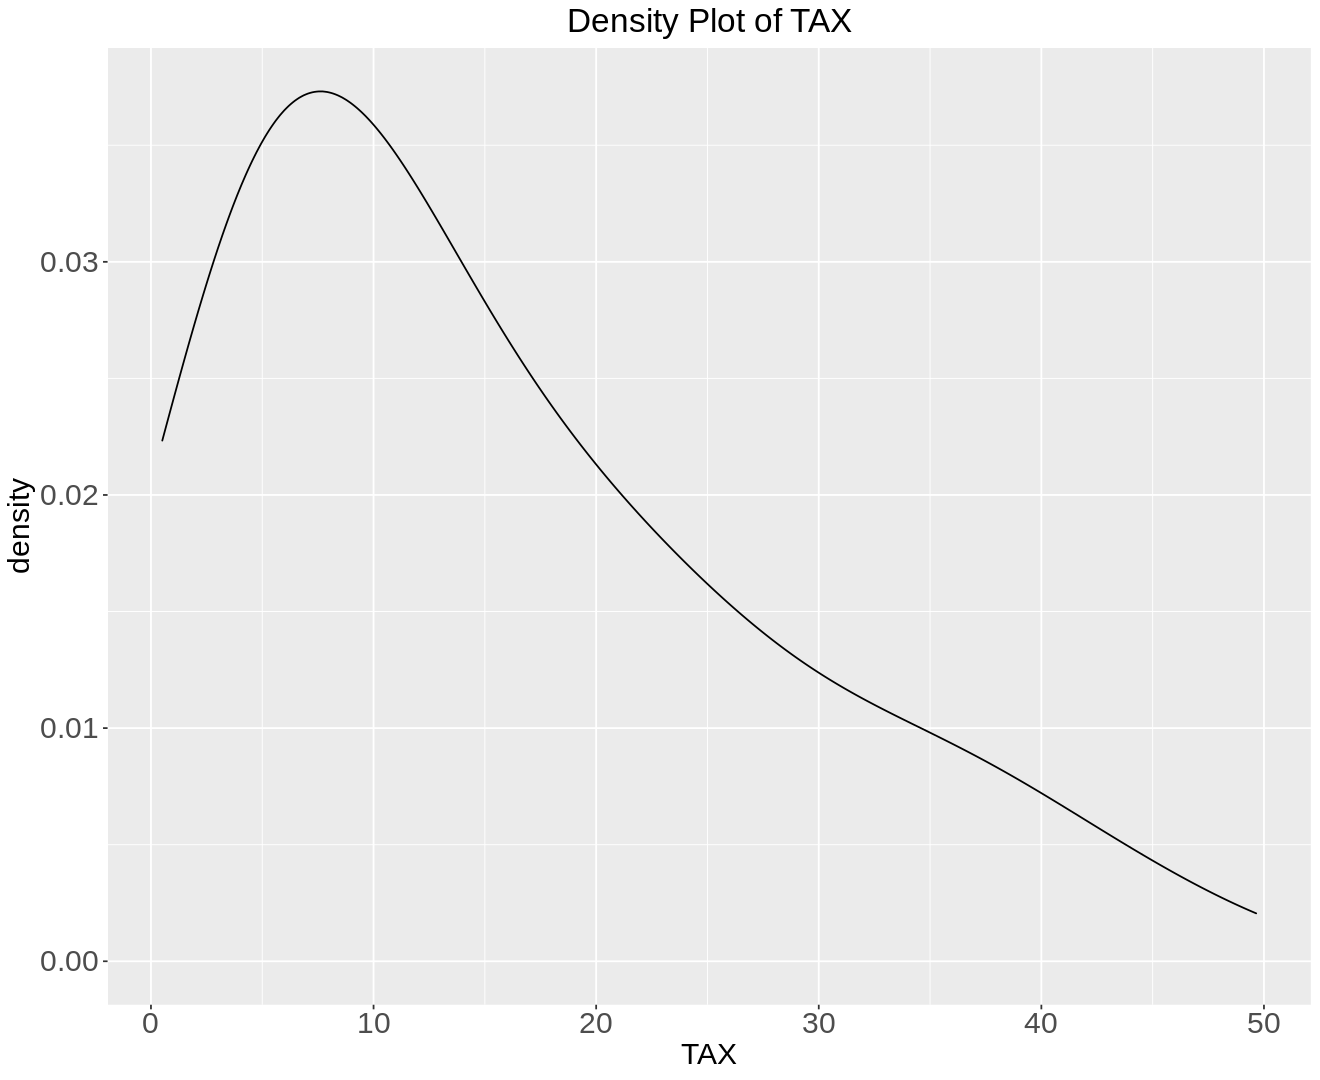

In [141]:
#Density Plot Distribution of the Tax Column
ggplot(df, aes(x= TAX)) + 
geom_density(bw = 5) + 
ggtitle("Density Plot of TAX") + 
 theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

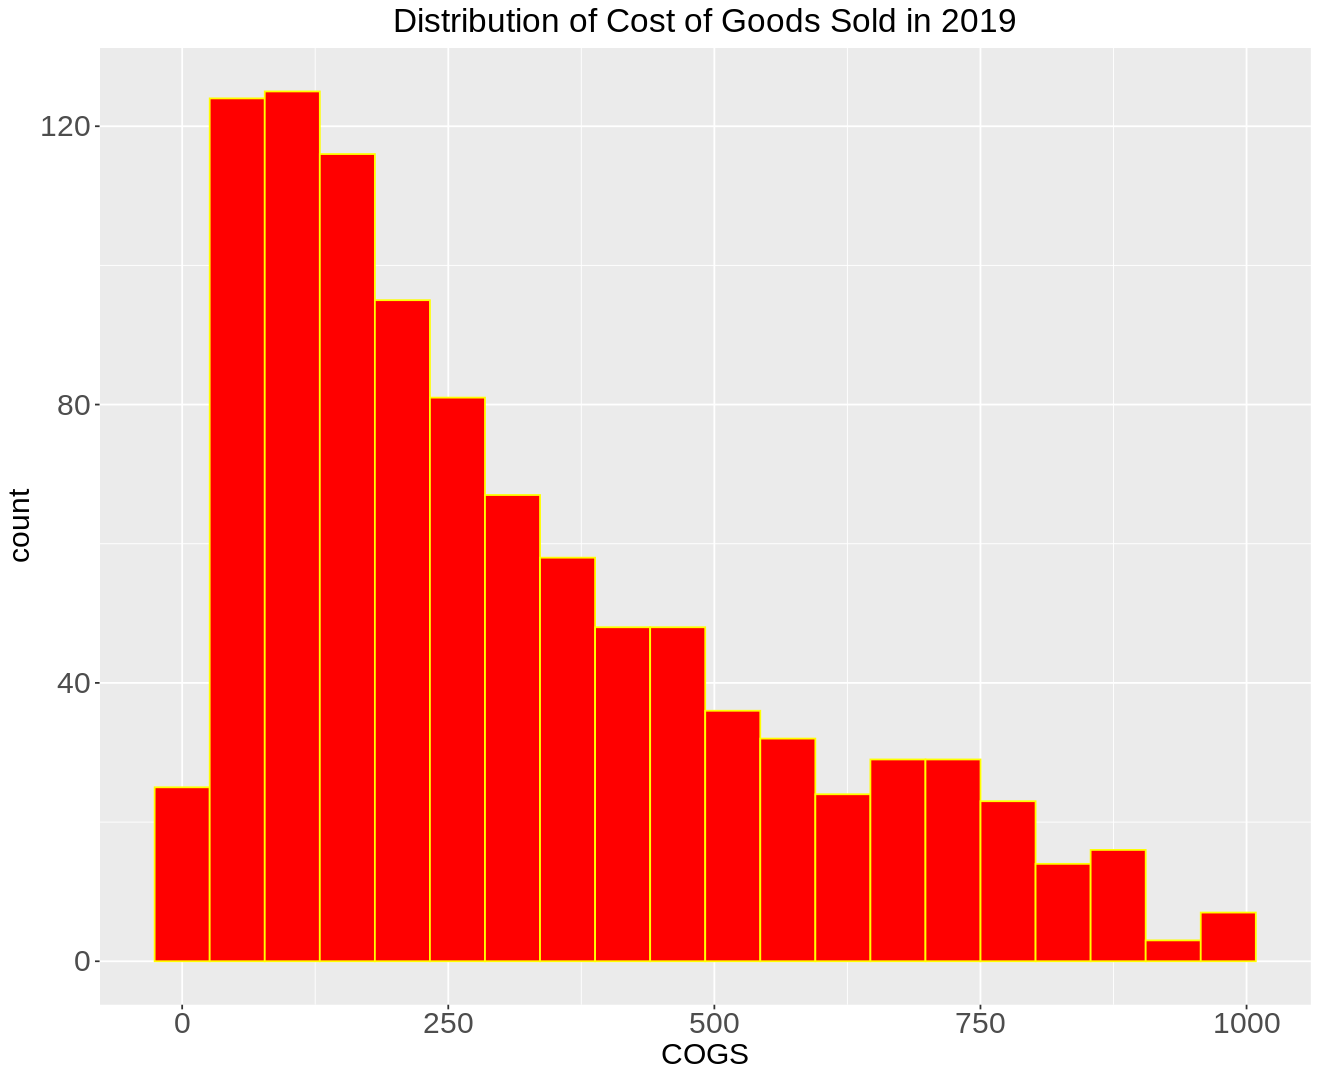

In [148]:
ggplot(df, aes(x = COGS)) +

geom_histogram( bins = 20, color='yellow', fill = 'red') +

ggtitle("Distribution of Cost of Goods Sold in 2019") + 

 theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

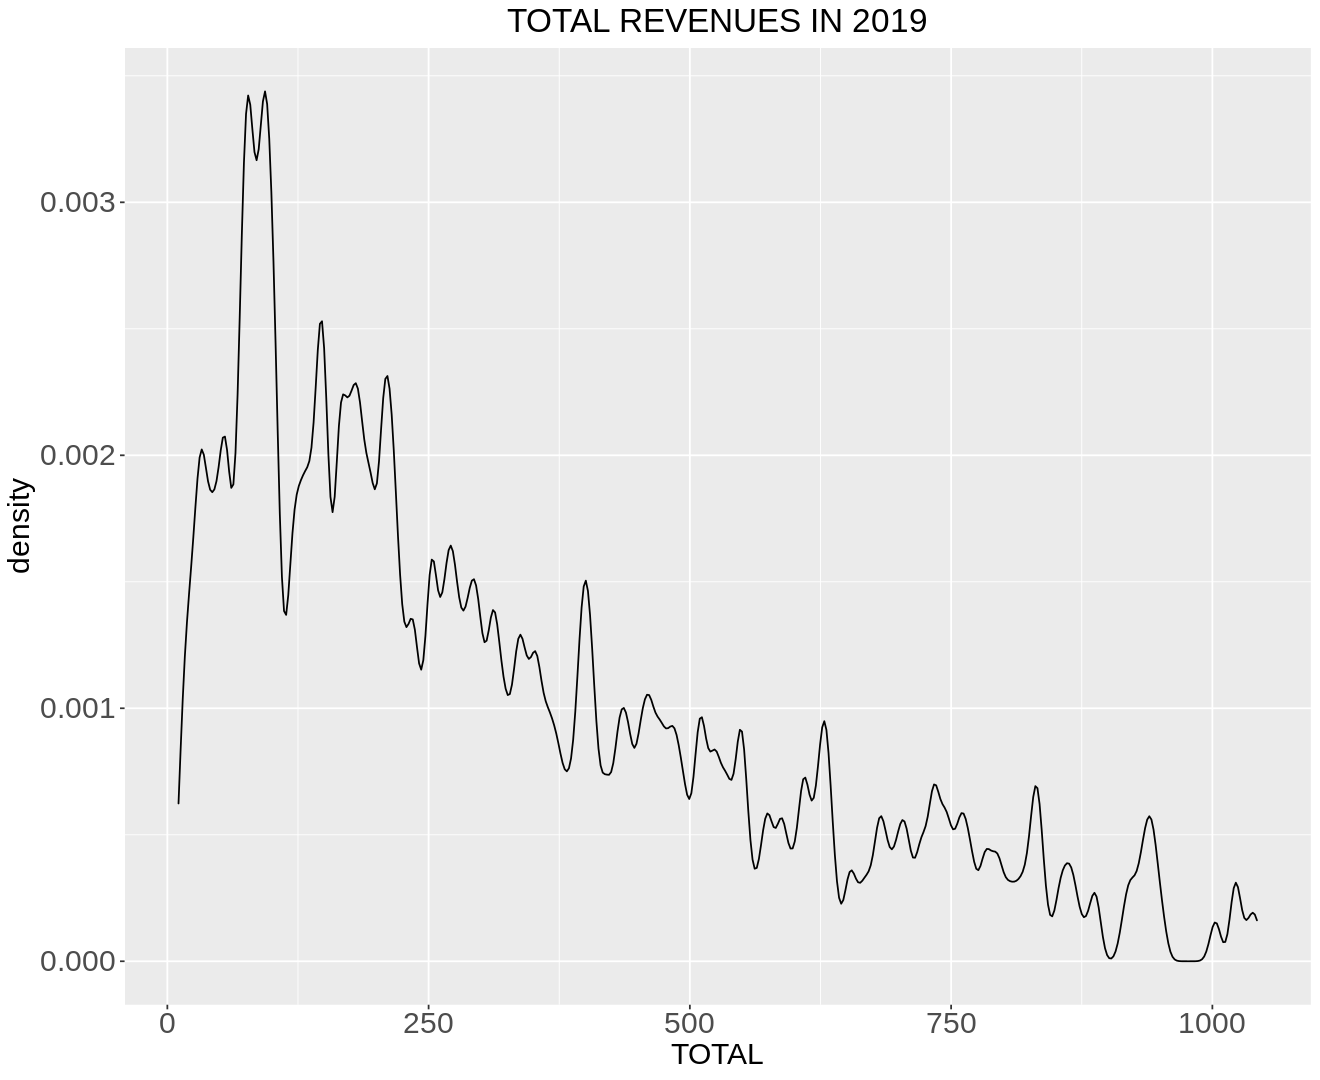

In [149]:
#Density Plot Distribution of the Total Column
ggplot(df, aes(x= TOTAL)) + 
geom_density(bw = 5) + 
ggtitle("TOTAL REVENUES IN 2019") + 
 theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

# **Bivariate Analysis**

In [160]:
head(df)

,BRANCH,CUSTOMER.TYPE,GENDER,PRODUCT.LINE,UNIT.PRICE,QUANTITY,TAX,DATE,PAYMENT,COGS,GROSS.MARGIN.PERCENTAGE,GROSS.INCOME,RATING,TOTAL,MONTH,DAY,MINUTE
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,Ewallet,522.83,4.761905,26.1415,52,548.9715,1,5,08
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,Cash,76.40,4.761905,3.8200,57,80.2200,3,8,29
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,Credit card,324.31,4.761905,16.2155,35,340.5255,3,3,23
4,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,Ewallet,465.76,4.761905,23.2880,45,489.0480,1,27,33
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,Ewallet,604.17,4.761905,30.2085,14,634.3785,2,8,37
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,Ewallet,597.73,4.761905,29.8865,2,627.6165,3,25,30


In [162]:
#Pair Plot of Categorical Variables

install.packages("GGally")
library("GGally")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in cor(x, y):
“the standard deviation is zero”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `

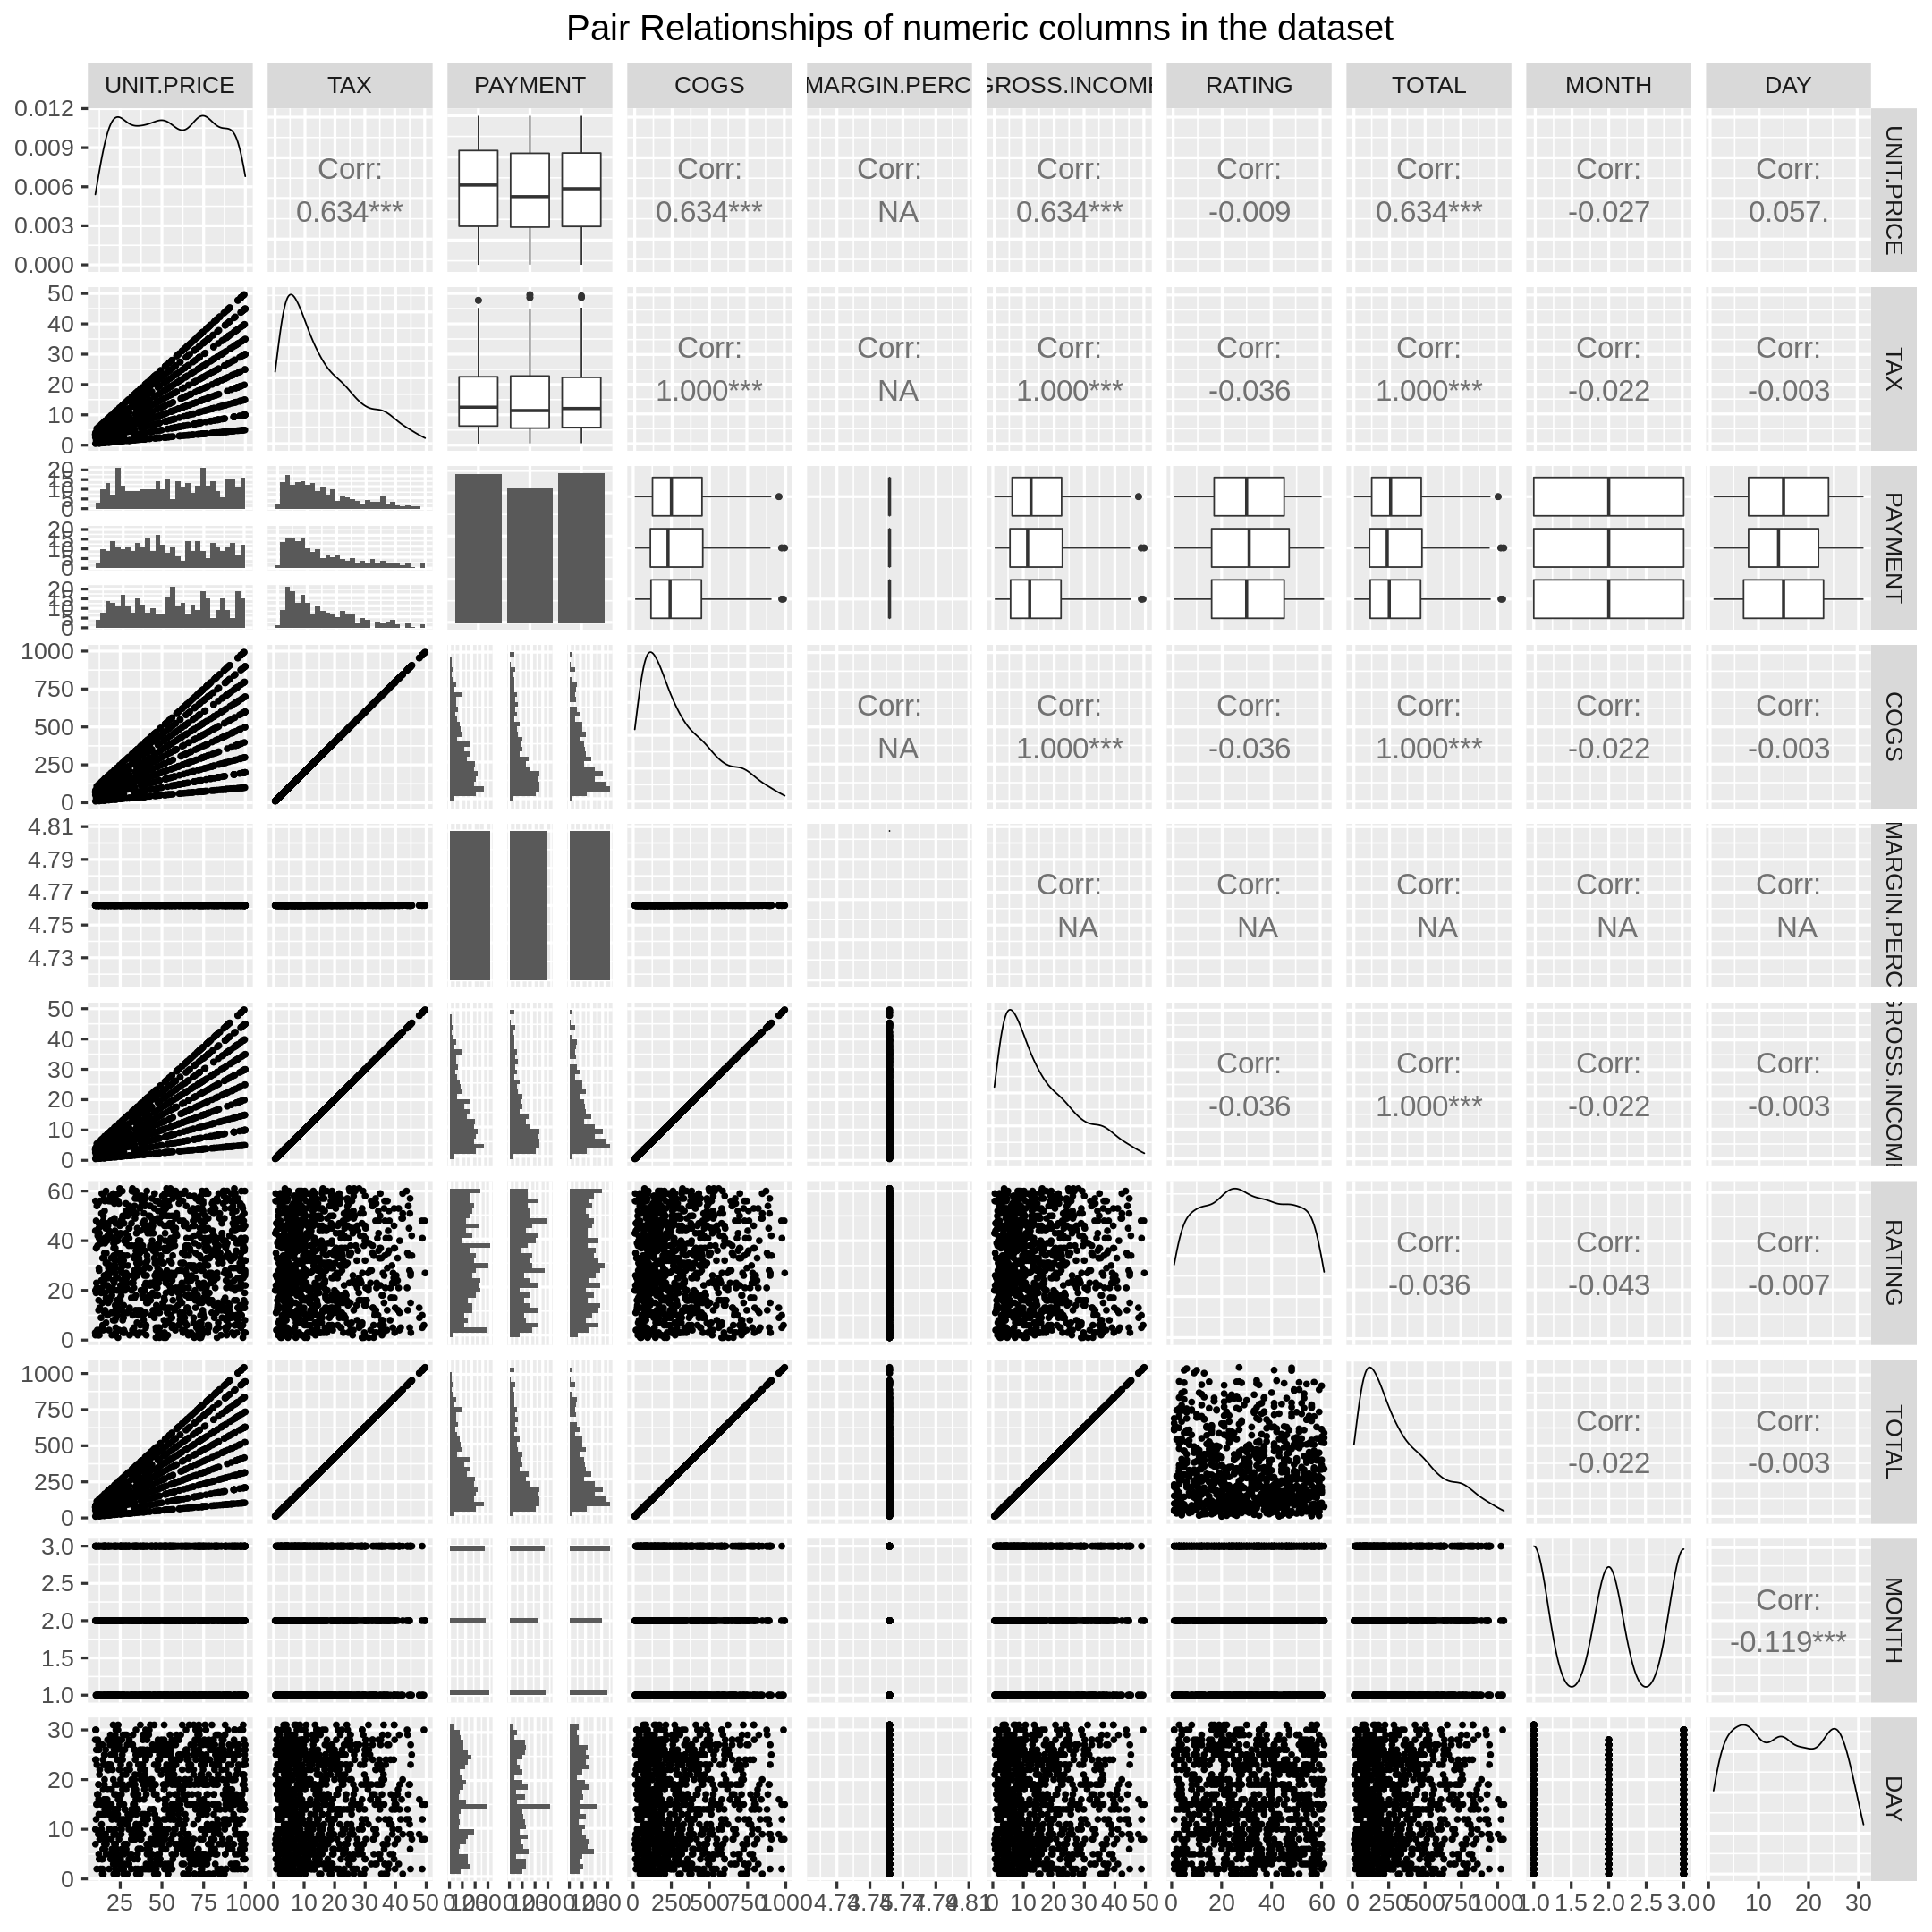

In [168]:
options(repr.plot.width = 18, repr.plot.height = 18)
ggpairs(num.cols, upper = list(continuous = wrap("cor", size = 7))) + 
labs(title = "Pair Relationships of numeric columns in the dataset") +
    theme_grey(base_size = 20) +
    theme(plot.title = element_text(hjust = 0.5))

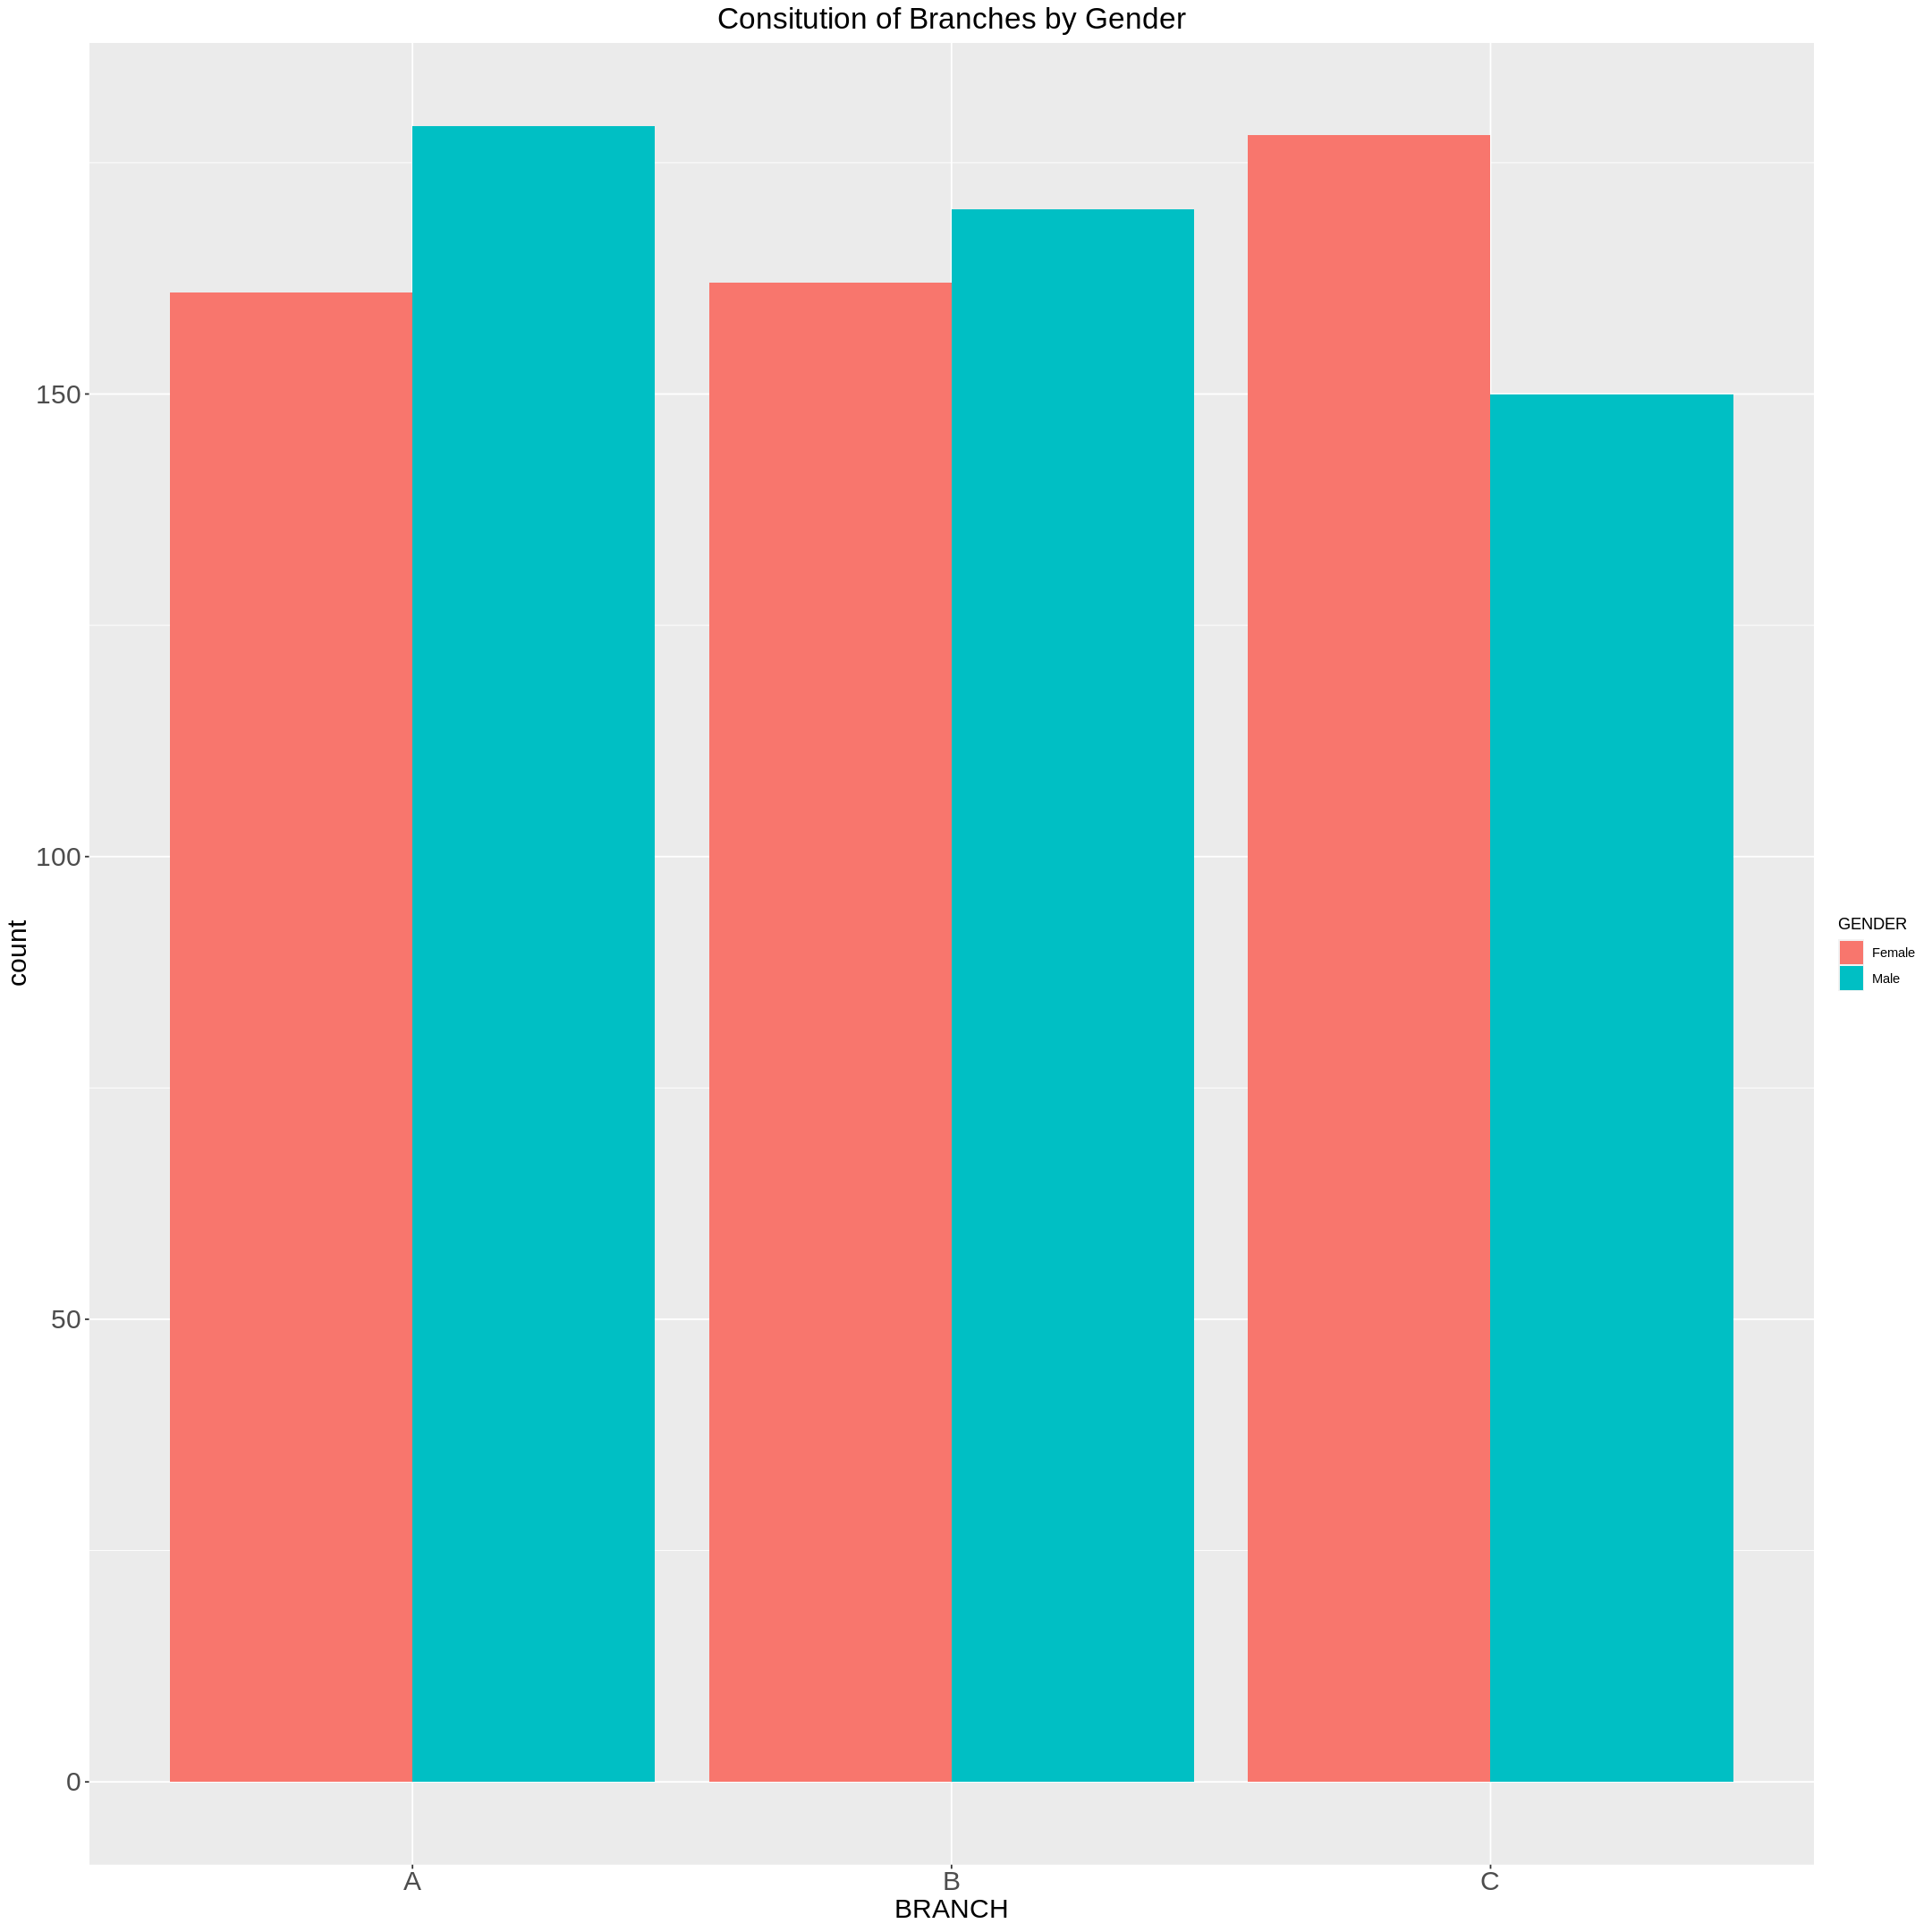

In [169]:
ggplot(df, aes(x = BRANCH, fill = GENDER)) + 
  geom_bar(position= "dodge") +
  ggtitle("Consitution of Branches by Gender") +
   theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

Branch A & B have majority men whilst Branch C has majority females. 

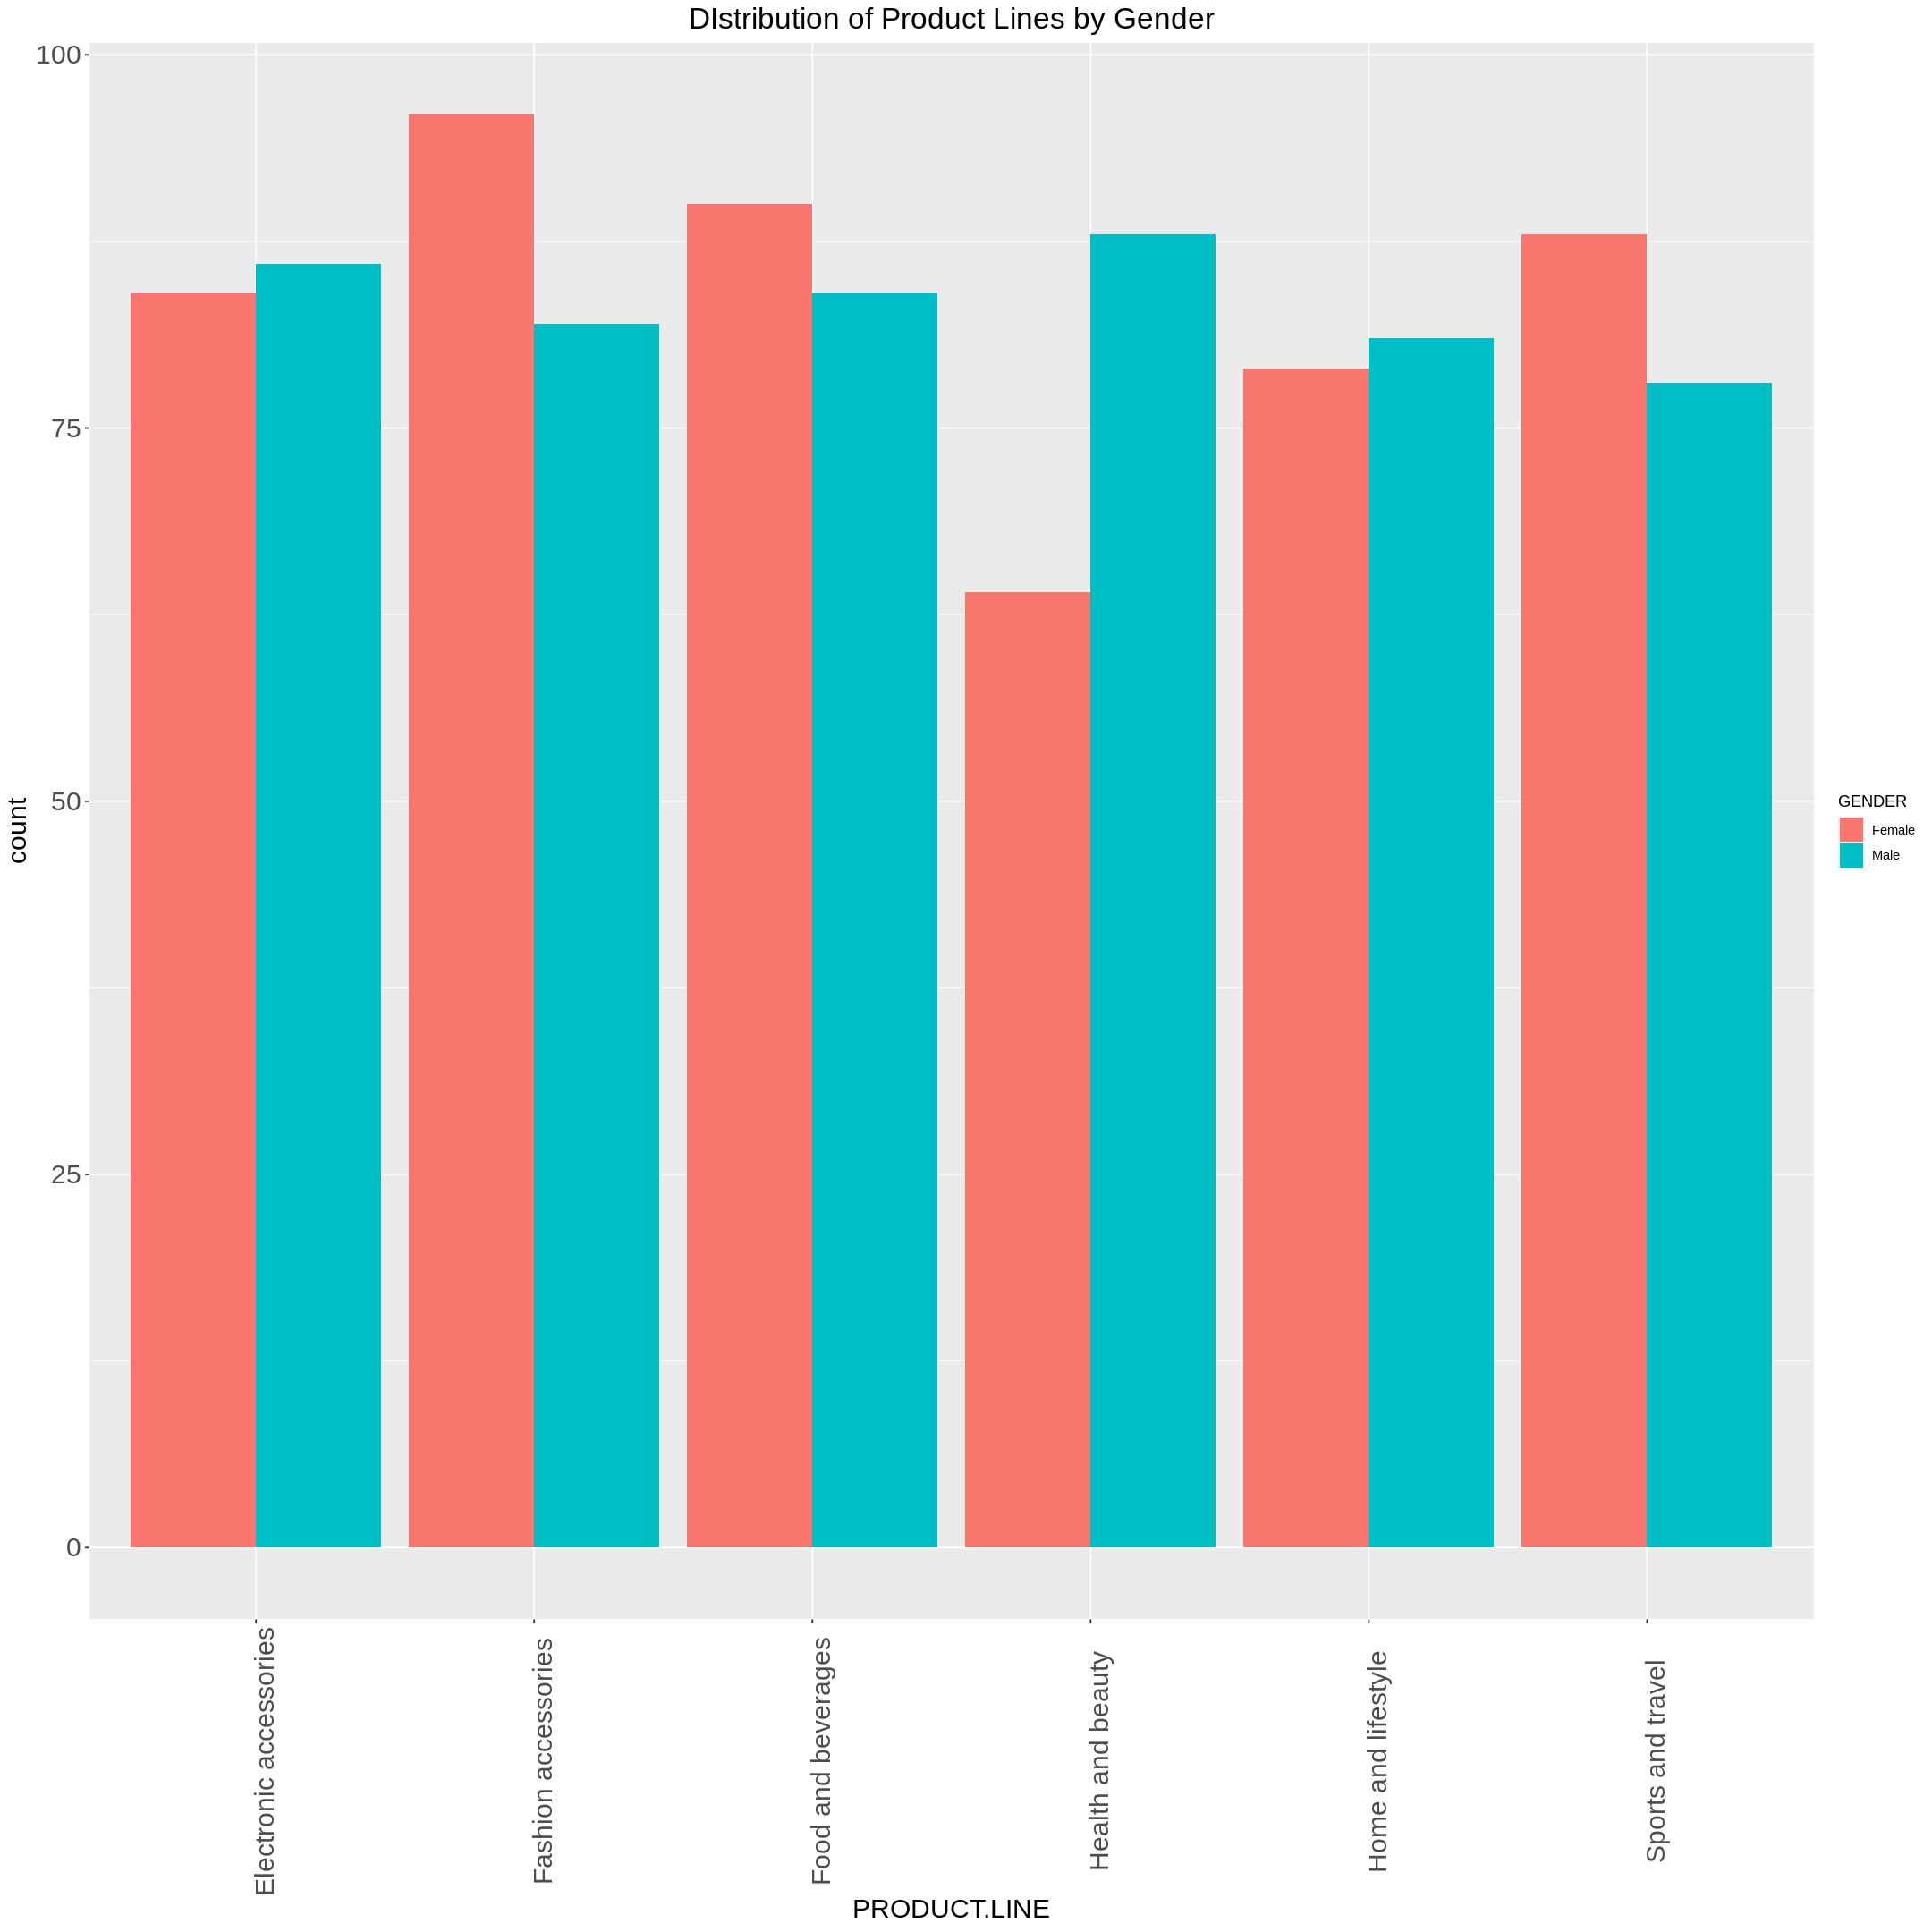

In [170]:
ggplot(df, aes(x = PRODUCT.LINE, fill = GENDER)) + 
  geom_bar(position= "dodge") +
  theme(axis.text.x = element_text(angle = 90)) +
  ggtitle("DIstribution of Product Lines by Gender") +  theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

Men ordered more electronic accessories,health and beauty and Sports & travel products than women. 

Majority of the products were Fashion Accessories ordered by women. 

Women ordered majority of fashion accessories, food and beverages and home and lifestyle products.



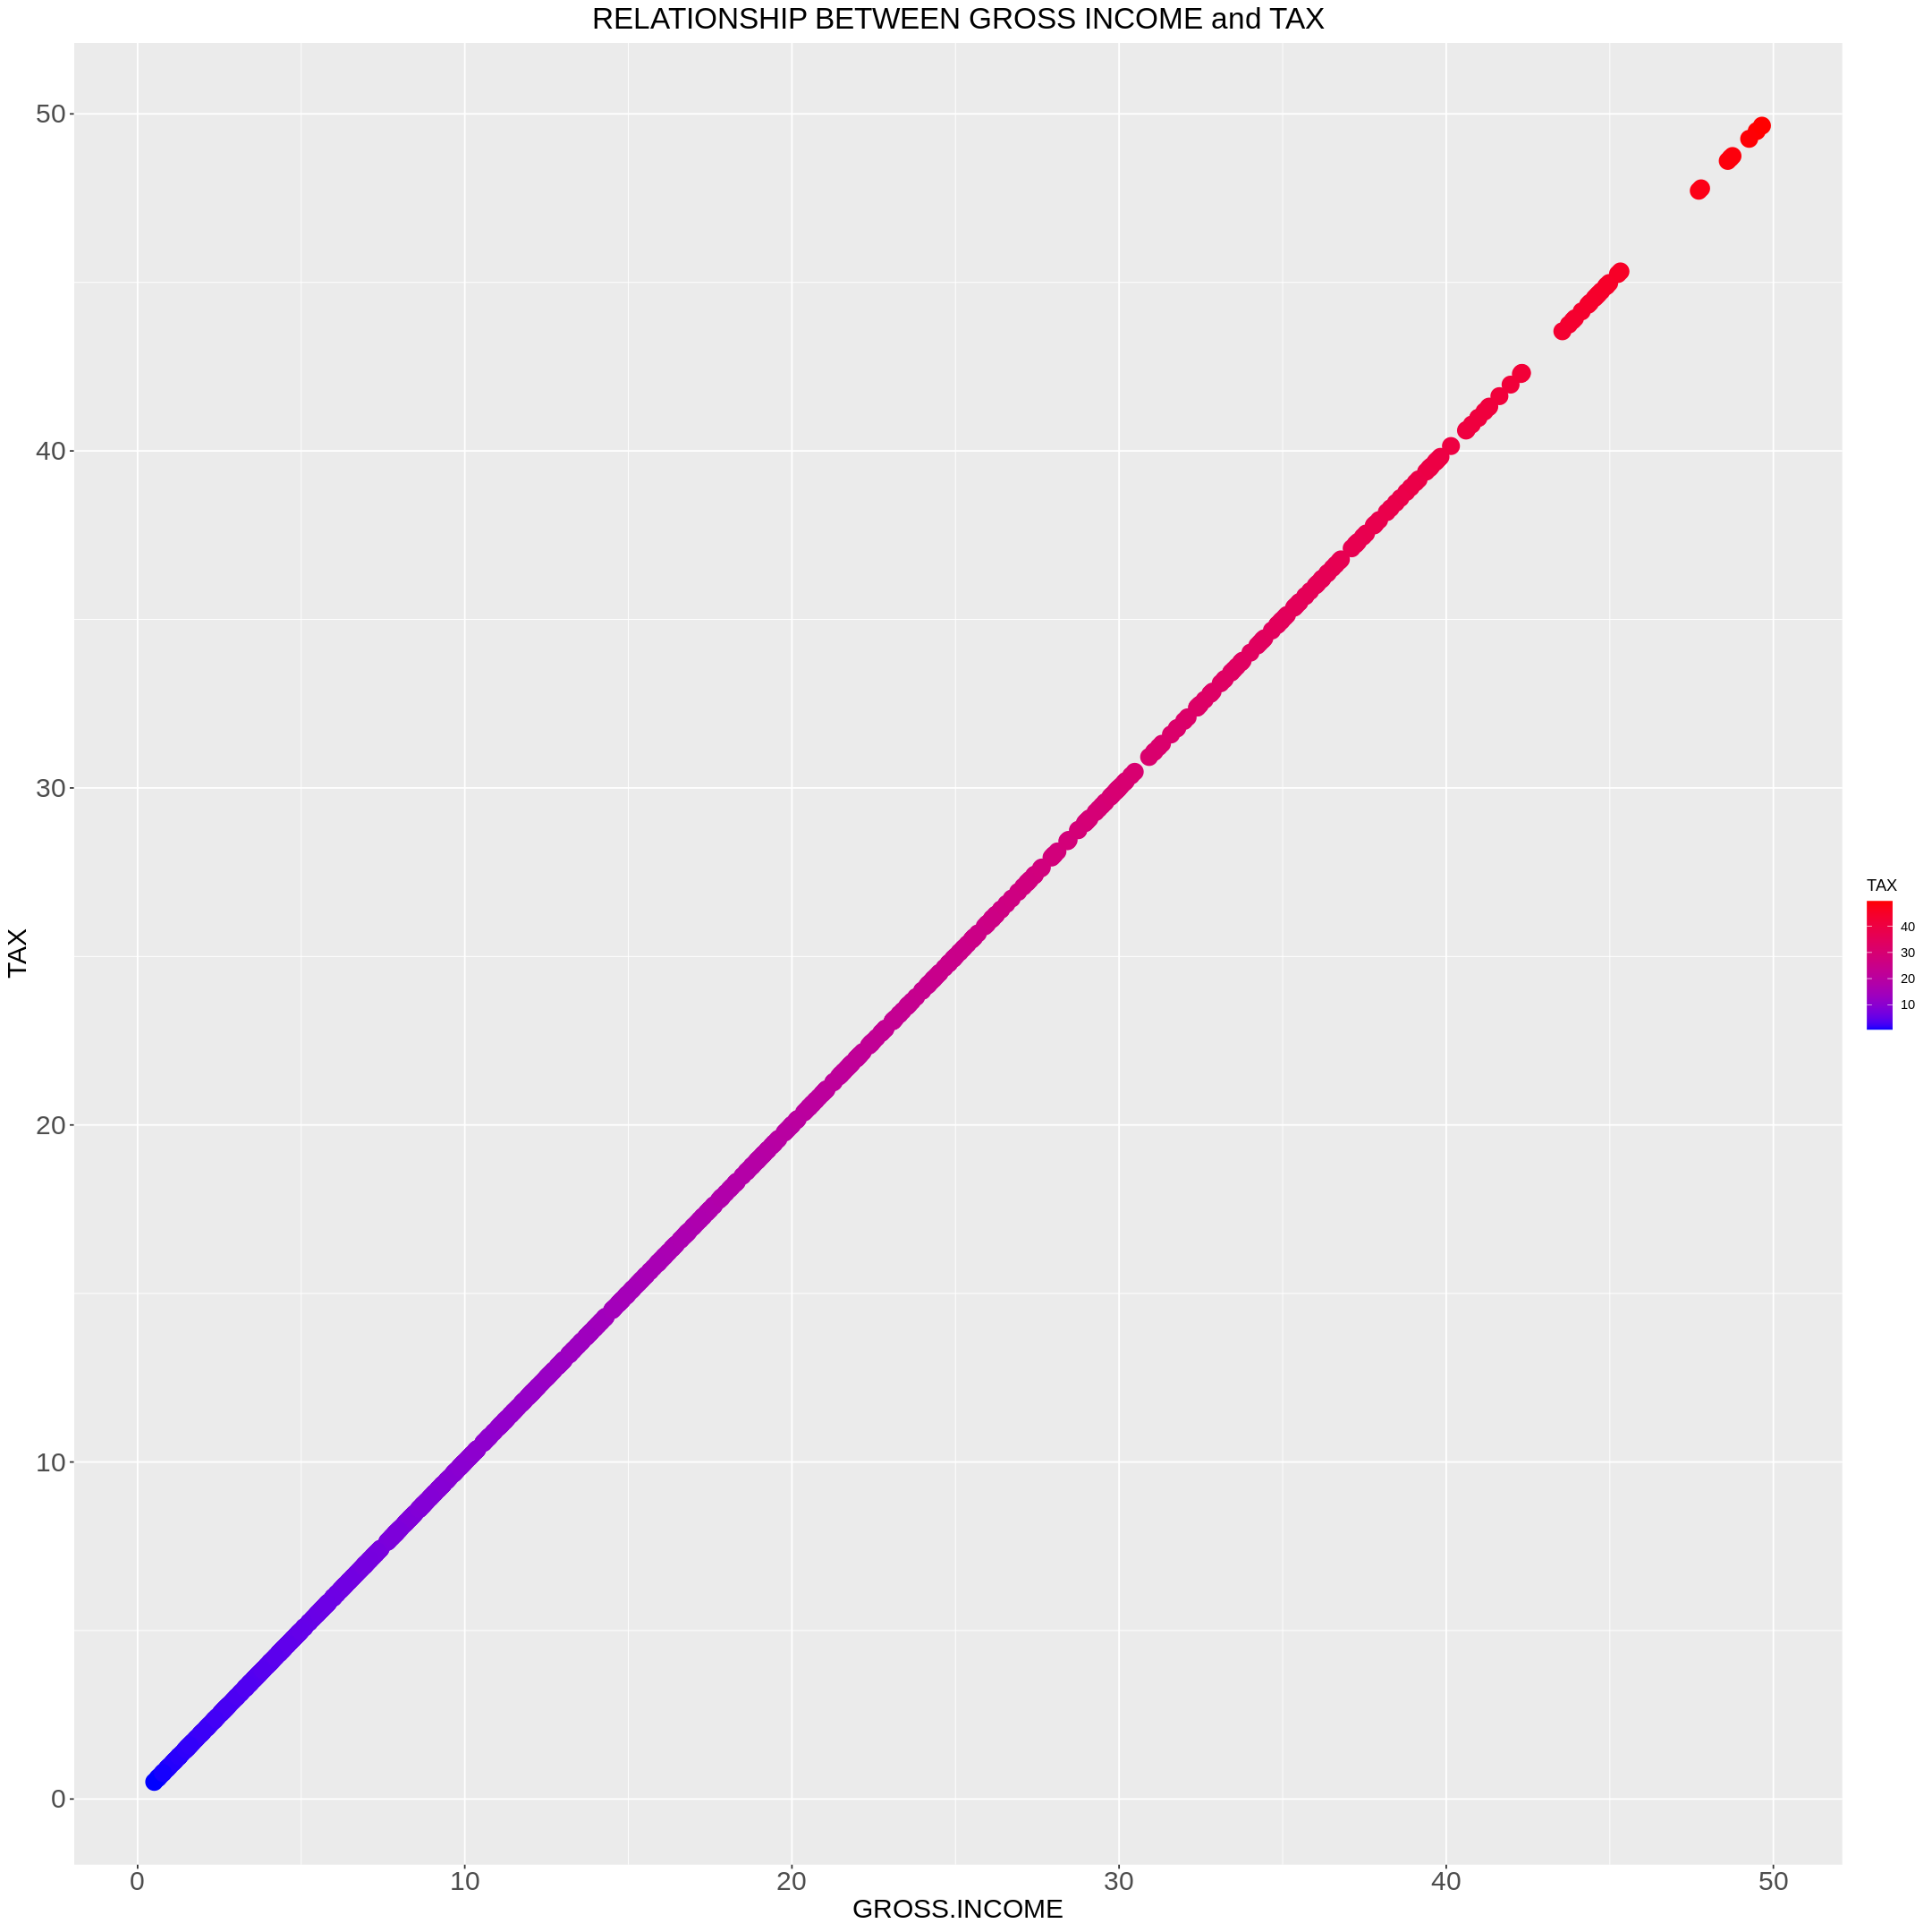

In [180]:
ggplot(df, aes(x=GROSS.INCOME, y=TAX)) +

geom_point(aes(color=TAX), size=5) + scale_color_gradient(low='blue', high = 'red') +

ggtitle("RELATIONSHIP BETWEEN GROSS INCOME and TAX") +  theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

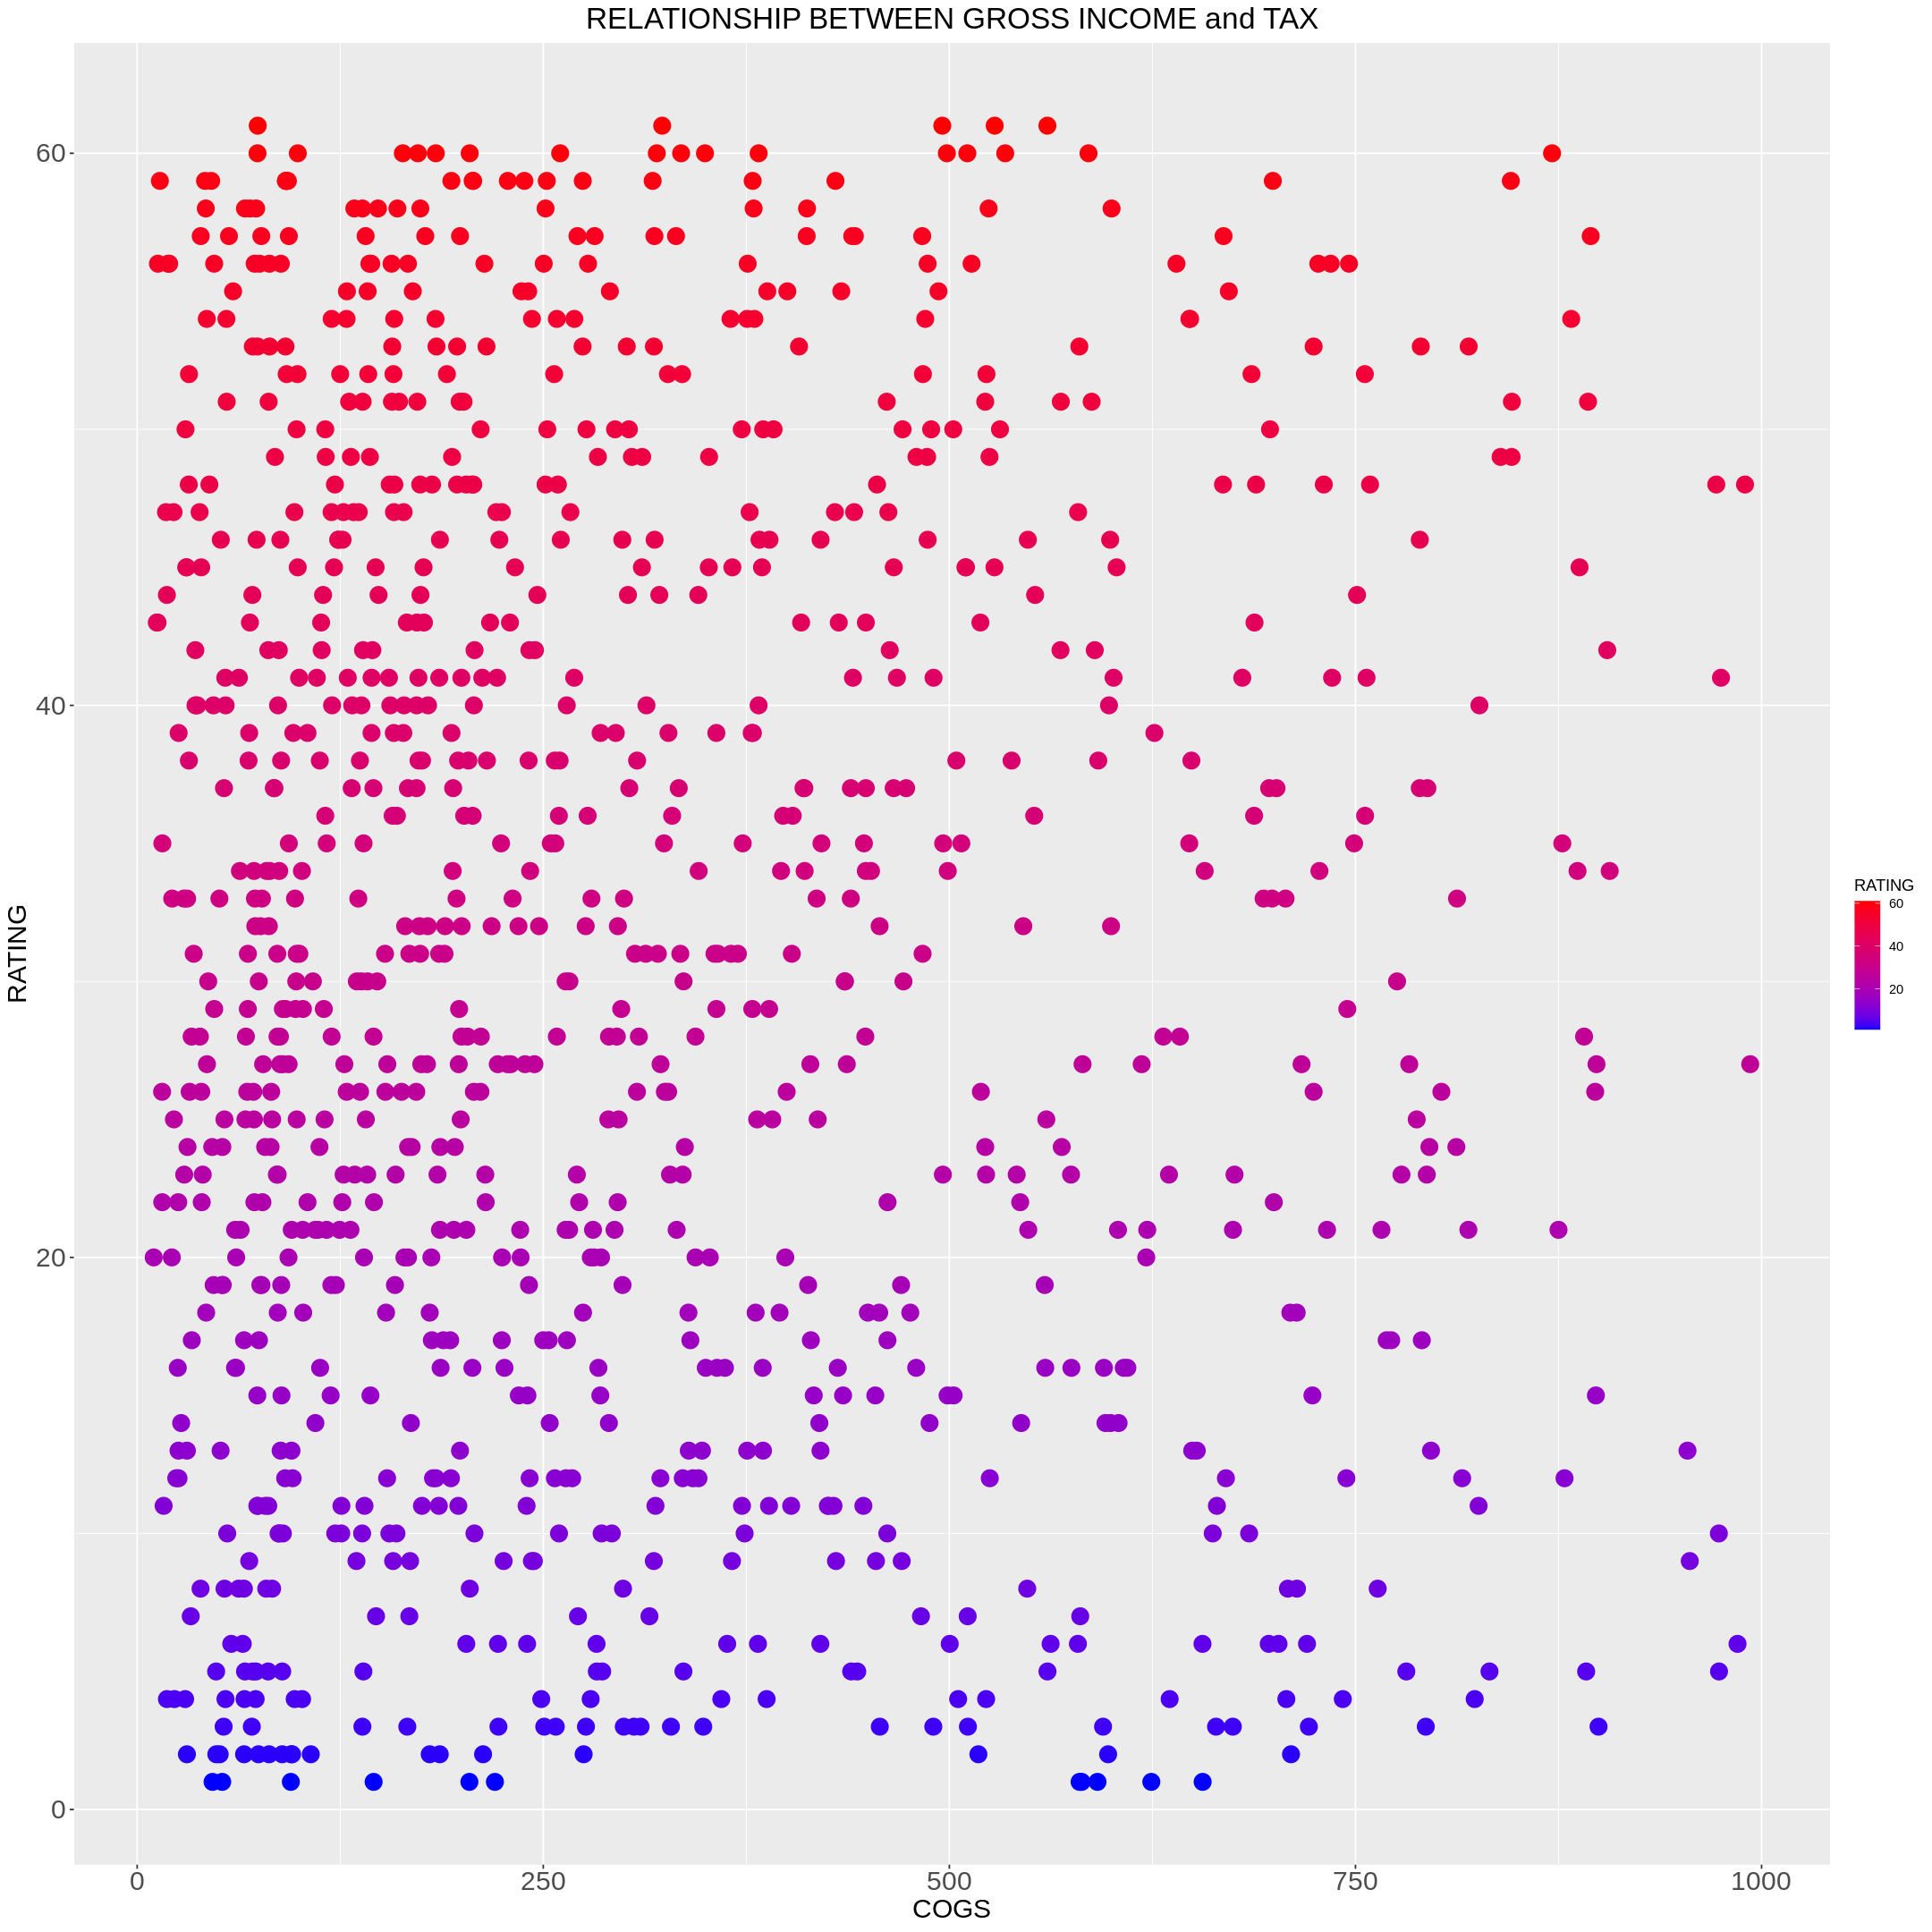

In [181]:
ggplot(df, aes(x=COGS, y=RATING)) +

geom_point(aes(color=RATING), size=5) + scale_color_gradient(low='blue', high = 'red') +

ggtitle("RELATIONSHIP BETWEEN GROSS INCOME and TAX") +  theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 20))

# **Multivariate Analysis**

In [188]:
#Correlation in the numerical columns
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.89 loaded



In [184]:
str(num.cols)

'data.frame':	1000 obs. of  10 variables:
 $ UNIT.PRICE             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ TAX                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ PAYMENT                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ COGS                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ GROSS.MARGIN.PERCENTAGE: num  4.76 4.76 4.76 4.76 4.76 ...
 $ GROSS.INCOME           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ RATING                 : int  52 57 35 45 14 2 19 41 33 20 ...
 $ TOTAL                  : num  549 80.2 340.5 489 634.4 ...
 $ MONTH                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ DAY                    : int  5 8 3 27 8 25 25 24 10 20 ...


In [185]:
num.cols$PAYMENT <- as.numeric(num.cols$PAYMENT)

In [171]:
head(df)

,BRANCH,CUSTOMER.TYPE,GENDER,PRODUCT.LINE,UNIT.PRICE,QUANTITY,TAX,DATE,PAYMENT,COGS,GROSS.MARGIN.PERCENTAGE,GROSS.INCOME,RATING,TOTAL,MONTH,DAY,MINUTE
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,Ewallet,522.83,4.761905,26.1415,52,548.9715,1,5,08
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,Cash,76.40,4.761905,3.8200,57,80.2200,3,8,29
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,Credit card,324.31,4.761905,16.2155,35,340.5255,3,3,23
4,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,Ewallet,465.76,4.761905,23.2880,45,489.0480,1,27,33
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,Ewallet,604.17,4.761905,30.2085,14,634.3785,2,8,37
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,Ewallet,597.73,4.761905,29.8865,2,627.6165,3,25,30
